<center><h1> <font face='楷体'> 2022年全国大学生数据分析大赛A卷 </font></h1></center>
<h3><font face='仿宋'>题目A：医药电商销售数据分析 </font></h3>

**题目要求：**
<font face='仿宋'>
<br>&nbsp;&nbsp;&nbsp;&nbsp;随着国家政策的逐步开放，越来越多的药品可以在网络上购买，医药电商平台蒸蒸日上，受新冠疫情的影响，线下药店购买困难，更让医药电商进入了更多消费者的视野，各大药企也纷纷加大力度布局医药电商领域。但电商模式与线下零售有所不同，如何更好的经营医药电商成为药企急需解决的问题。本题采集了天猫维生素类的药品，请针对维生素药品进行数据的清洗、分析与挖掘，并回答下列问题。 
<br>1．对店铺进行分析，一共包含多少家店铺，各店铺的销售额占比如何？给出销售额占比最高的店铺，并分析该店铺的销售情况。 
<br>2. 对所有药品进行分析，一共包含多少个药品，各药品的销售额占比如何？给出销售额占比最高的10个药品，并绘制这 10个药品每月销售额曲线图。 
<br>3．对所有药品品牌进行分析，一共包含多少个品牌，各品牌的销售额占比如何？给出销售额占比最高的10个品牌，并分析这10个品牌销售较好的原因？ 
<br>4. 预测天猫维生素类药品未来三个月的销售总额并绘制拟合曲线，评估模型性能和误差。 
<br>5. 一家药企计划将新的维生素品牌进行网络销售，聘请你当企业的顾问，请你设计一份不超过两页纸的电商经营策略。</font>

<h4>数据预处理</h4>
<h5>读取文件到pandas</h5>

In [3]:
import numpy as np
import pandas as pd

data=pd.read_excel('data.xlsx')
data_view=data.head(5)
data_view

,date_time,id,shop_name,title,sku_name,price,sold,discount,brand,parameter
0,2020-11-01,3985971101463,宜度海外专营店,特价处理！超低价19.9元起！含维生素ABCDE B族B12 维生素锌硒片,维生素e 300粒--买3送1,60.900000,19,9折,NaN,厂名:Puritan's Pride||品牌:Puritan‘s Pride/普丽普莱||生...
1,2020-11-01,4224064440294,天猫国际进口超市,FANCL男40岁综合营养包30包/袋*2复合多种维生素日本芳珂fancl,(【直营】日本FANCL/芳珂 40岁男性综合维生素营养 30袋（30天量）)*2,500.000000,71,9折,NaN,品牌:FANCL||系列:综合营养包||生产企业:FANCL株式会社
2,2021-12-01,3437759489038,阿里健康大药房,民生21金维他多维元素片30片儿童男女成人补充维生素矿物质缺乏,国民大牌| 补充21种维矿,22.416667,366,9.5折,NaN,产品名称:21金维他 多维元素片（21） 30片*1瓶/盒||药品通用名:多维元素片（21）...
3,2021-12-01,576002931540,天猫国际进口超市,【直营】美国进口安利简装倍立健多种复合维生素矿物质营养186片,NaN,452.250000,28,9.5折,NaN,厂名:Amway Dominican Republic LLC||生产企业:Amway||系...
4,2021-03-01,4363644898037,阿里健康大药房,买2送礼】elevit/爱乐维复合维生素片140粒维生素缺乏症贫血官方,爱乐维玛咖锌淫羊藿胶囊140粒+爱乐维 复合维生素片30片/盒,371.666667,32,9折,NaN,品牌:elevit/爱乐维||药品名称:复合维生素片||药品通用名:复合维生素片||生产企业...


第一题：
<br>1．对店铺进行分析，一共包含多少家店铺，各店铺的销售额占比如何？给出销售额占比最高的店铺，并分析该店铺的销售情况。 </br>

In [5]:
# discount 提取数字，正则表达式
data['discount'] = data['discount'].str.extract(r'(^\d?.?\d)',expand=True) 
data['discount'].fillna(value=10,inplace = True)
print(data['discount'])

# 转换数据price,sold,discount的类型
#print(data['discount'].dtypes)
data['price'] = pd.to_numeric(data['price'],downcast="float")
data['sold'] = pd.to_numeric(data['sold'],downcast="float")
data['discount'] = pd.to_numeric(data['discount'],downcast="float")
print(data['price'].dtypes)
print(data['sold'].dtypes)
print(data['discount'].dtypes)


0          9
1          9
2        9.5
3        9.5
4          9
        ... 
75105      9
75106      9
75107      9
75108      9
75109      9
Name: discount, Length: 75110, dtype: object
float32
float32
float32


C:\Users\paq13\AppData\Local\Temp\ipykernel_31004\4036670670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['discount'].fillna(value=10,inplace = True)


In [6]:
# 多少家店铺
shop_groups = data.groupby('shop_name')
print("一共包含",len(shop_groups),"家店铺")

一共包含 26 家店铺


In [7]:
# 各店铺的销售额占比如何
#计算销售额
data['sold_sum'] = data['price']*data['sold']*data['discount']*0.1
## 计算原价
data['pre_sold_sum'] = data['price']*data['sold'] 
print(data[['price','sold','discount','sold_sum','pre_sold_sum']].head(4))
ShopName = []
SoldSum = []
for name,group in shop_groups:
    ShopName.append(name)
    SoldSum.append(group.sold_sum.sum())
    print(name," 销售额:",group.sold_sum.sum()," 元") 

        price   sold  discount      sold_sum  pre_sold_sum
0   60.900002   19.0       9.0   1041.390015   1157.099976
1  500.000000   71.0       9.0  31950.000000  35500.000000
2   22.416666  366.0       9.5   7794.274902   8204.500000
3  452.250000   28.0       9.5  12029.850586  12663.000000
ChemistWarehouse海外旗舰店  销售额: 55396804.0  元
LuckyVitamin海外旗舰店  销售额: 369791.6  元
NRC营养优选海外专营店  销售额: 1408813.0  元
SASA美国直邮  销售额: 325823.53  元
hihealth海外专营店  销售额: 3382795.0  元
nrfs湖畔海外专营店  销售额: 872791.25  元
nyc美林健康海外专营店  销售额: 4343254.0  元
skyshop海外专营店  销售额: 6506159.0  元
thejamy保健海外专营店  销售额: 9798825.0  元
同堂保健品专营店  销售额: 65397.375  元
天猫国际妙颜社  销售额: 35698040.0  元
天猫国际进口超市  销售额: 356101220.0  元
天猫超市  销售额: 114821700.0  元
宜度海外专营店  销售额: 6001668.5  元
康寿营养品店  销售额: 619887.9  元
康恩贝官方旗舰店  销售额: 95598720.0  元
康爱多大药房旗舰店  销售额: 4986435.5  元
搬运健康馆  销售额: 794800.6  元
焦作国控大药房旗舰店  销售额: 1546531.2  元
百康保健品专营店  销售额: 5288855.5  元
百秀大药房旗舰店  销售额: 2843618.2  元
美加精品  销售额: 646626.44  元
苏宁易购官方旗舰店  销售额: 10659591.0  元
进口/国产保健品精品店  销售额: 7

In [8]:
# 按店铺销售额排序
x = dict(zip(ShopName,SoldSum))
c=sorted(x.items(),key = lambda x: x[1],reverse=True)
ShopName = [x[0] for x in c]
SoldSum = [x[1] for x in c]

#各店铺的销售额占比
SoldSumtotal = sum(SoldSum)
SoldSumPercent = [x/SoldSumtotal for x in SoldSum]
#print(titleSoldSumPercent)
mylist = [ShopName,SoldSum,SoldSumPercent]
mymatrix = np.asmatrix(mylist)
mymatrix = mymatrix.T
xlxs_title = pd.DataFrame(mymatrix,columns=['店铺名称', '店铺销售额', '店铺销售额占比'])

#存入excel
xlxs_title.to_excel(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\各店铺的销售额占比.xlsx', sheet_name='各店铺的销售额占比')

Text(0.5, 1.0, '各店铺的销售额占比饼状图')

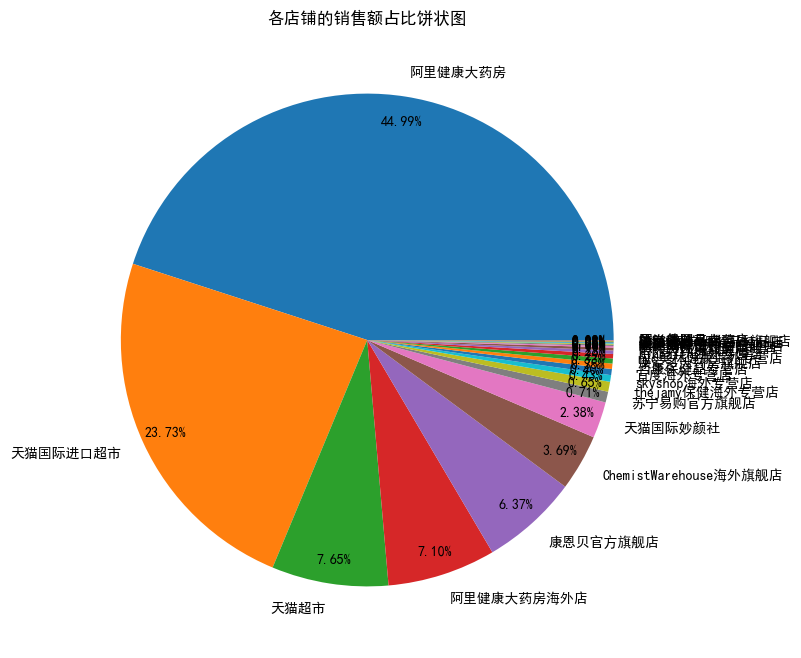

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.rcParams['font.sans-serif'] = 'Simhei'
plt.pie(SoldSum,autopct='%.2f%%',labels=ShopName,pctdistance=0.9)
plt.title('各店铺的销售额占比饼状图')

In [10]:
# 给出销售额占比最高的店铺，并分析该店铺的销售情况。
print("销售额最高的是：",ShopName[0])
print("销售总额：",SoldSum[0],"元")
MaxSum = shop_groups.get_group(ShopName[0])

销售额最高的是： 阿里健康大药房
销售总额： 675102700.0 元


In [11]:
#分析
MaxSum = shop_groups.get_group(ShopName[0]) #只取 阿里健康大药房 分组
#从时间上看
print(len(MaxSum))
MaxSum['date_time'] = pd.to_datetime(MaxSum['date_time'])  #转化数据类型
MaxSum_t = MaxSum.sort_values('date_time')#按时间排序
MaxSum_t = MaxSum_t.groupby('date_time')#按时间分组

16958


C:\Users\paq13\AppData\Local\Temp\ipykernel_31004\2666195555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MaxSum['date_time'] = pd.to_datetime(MaxSum['date_time'])  #转化数据类型


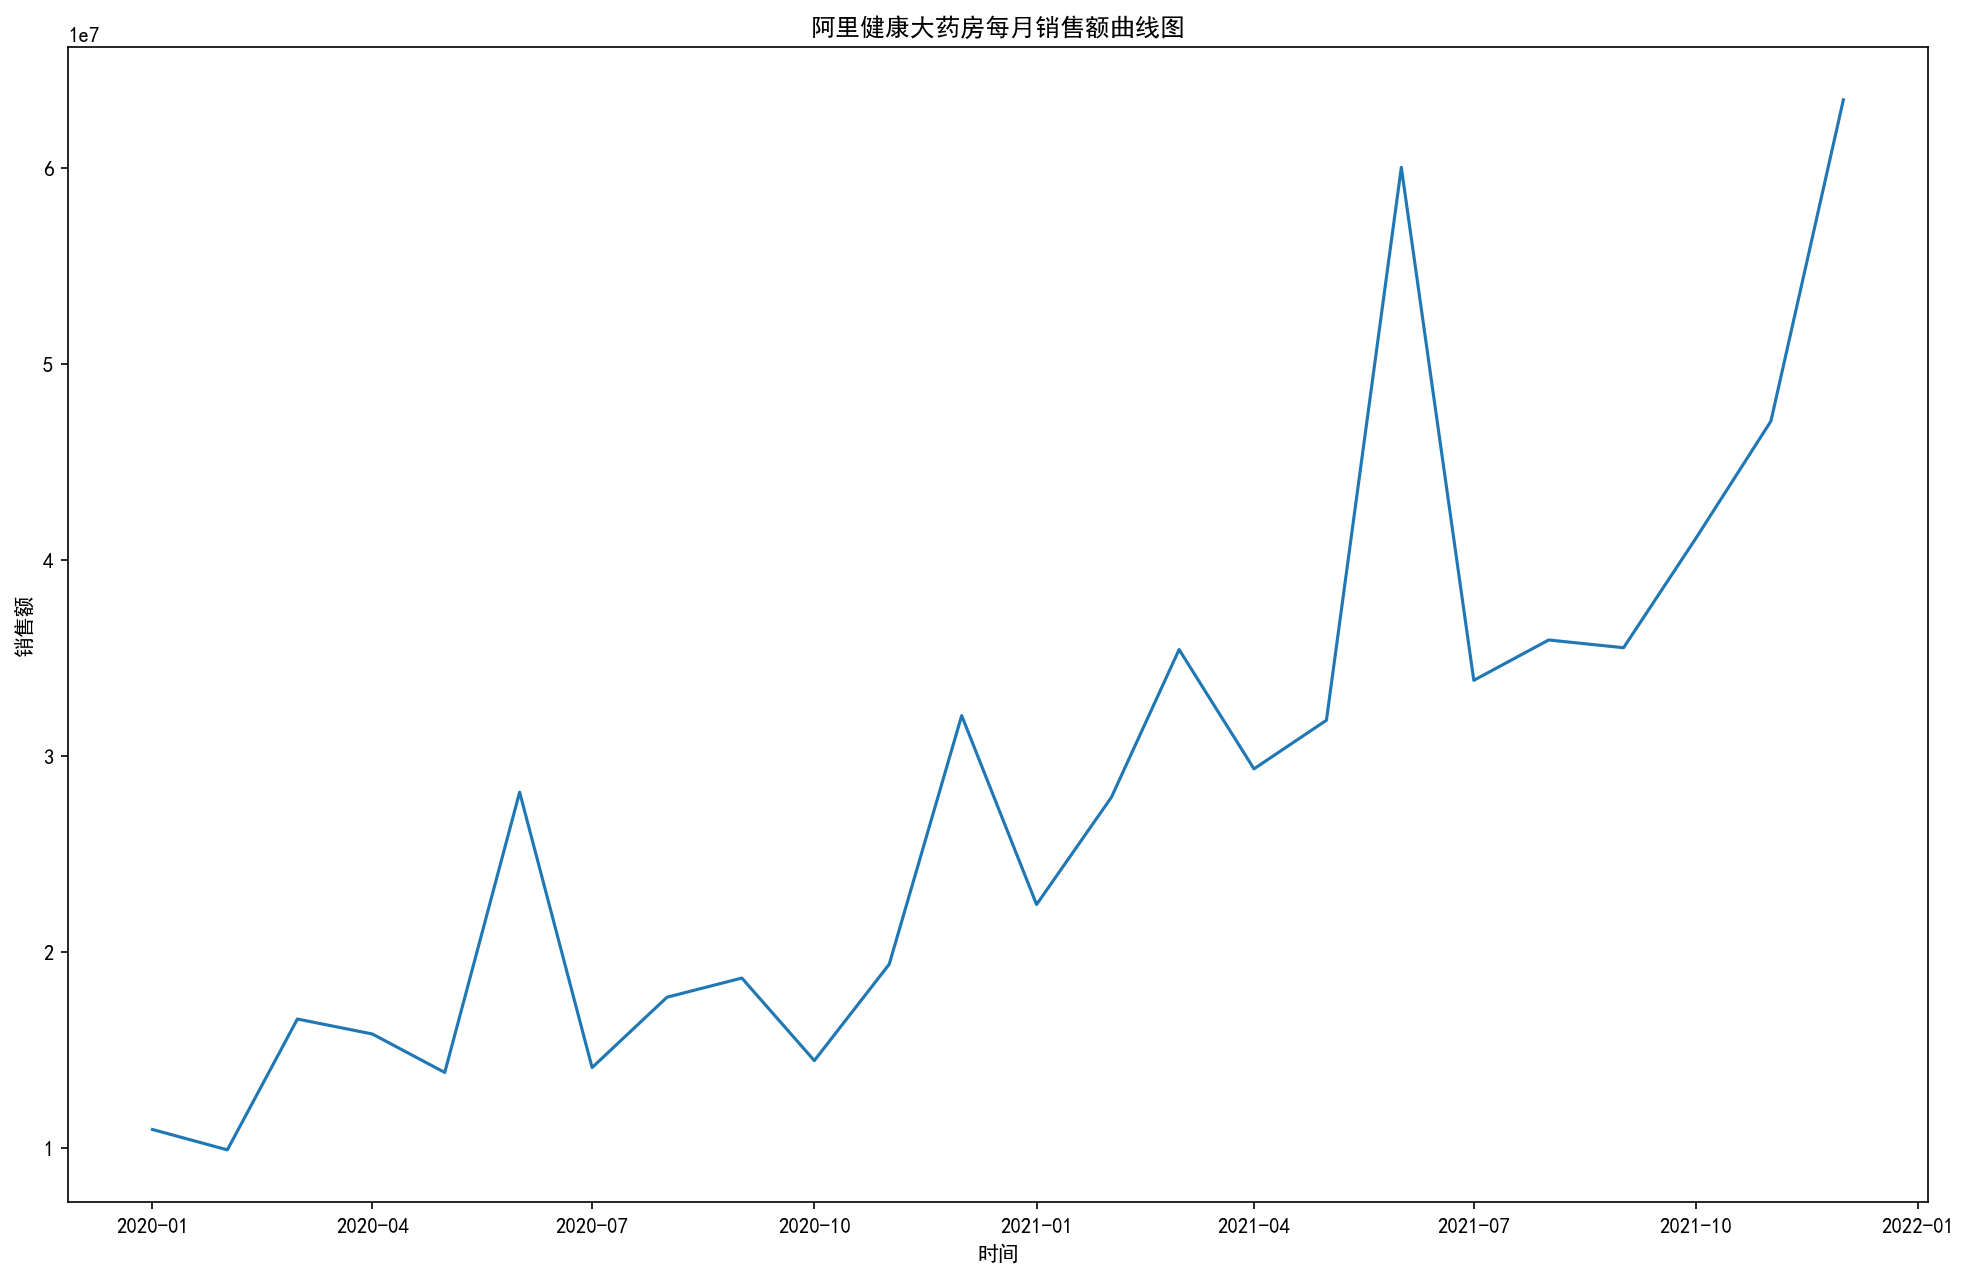

In [12]:
one_date = []
one_date_sold_sum = []
for date,group in MaxSum_t:
    one_date.append(date)
    one_date_sold_sum.append(group[["sold_sum"]].sum())

plt.figure(figsize=(16,10),dpi=150)
plt.xlabel('时间')
plt.ylabel('销售额')
plt.plot(one_date,one_date_sold_sum)
plt.title('阿里健康大药房每月销售额曲线图')
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\阿里健康大药房每月销售额曲线图.jpg')

1663


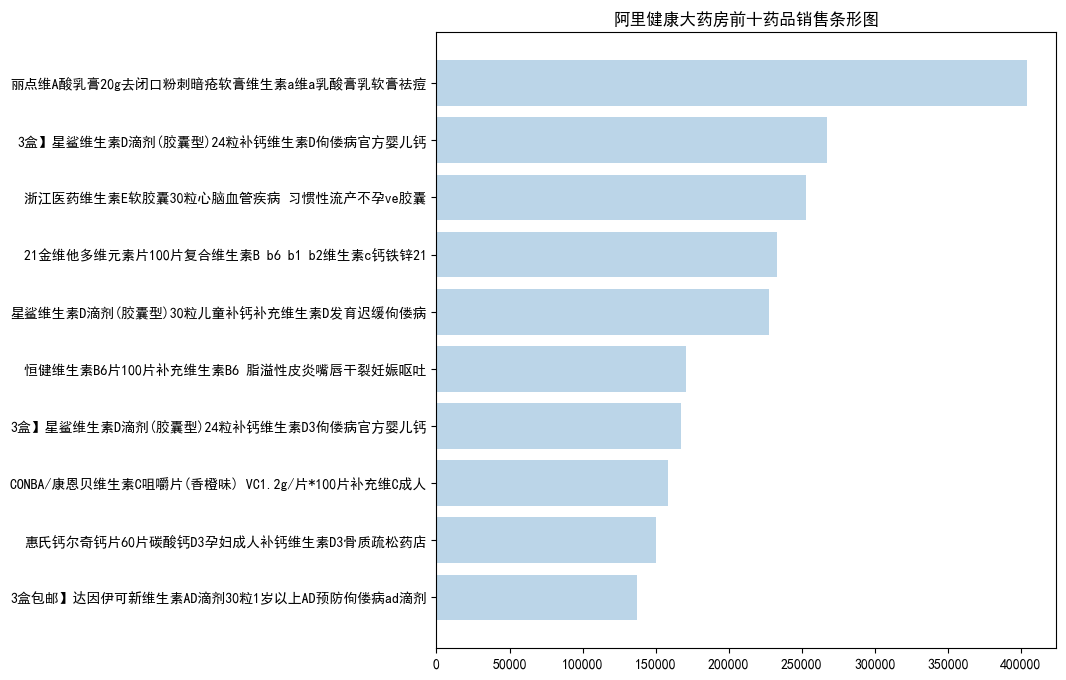

In [13]:
#从商品title看
MaxSum_title = MaxSum.groupby('title')#按title分组
print(len(MaxSum_title))
title_name=[]
title_sum = []
for title,group in MaxSum_title:
    title_name.append(title)
    T_sum = sum(group["sold"])
    #print(T_sum)
    title_sum.append(T_sum)
    #print(title)
    #print(len(group))
#title数量排序
x = dict(zip(title_name,title_sum))
c=sorted(x.items(),key = lambda x: x[1],reverse=True)
title_name = [x[0] for x in c]
title_sum = [x[1] for x in c]
#print(title_sum[:10])
#画条形图
plt.figure(figsize=(8,8))
plt.barh(title_name[:10][::-1],title_sum[:10][::-1],alpha=0.3)
plt.title(ShopName[0]+'前十药品销售条形图')
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\阿里健康大药房每月销售额曲线图.jpg')

第二题：
<br>对所有药品进行分析，一共包含多少个药品，各药品的销售额占比如何？给出销售额占比最高的10个药品，并绘制这 10个药品每月销售额曲线图。 

In [14]:
# 一共包含多少个药品
print(data.columns)
title_groups = data.groupby('title')
print("一共包含",len(title_groups),"个药品")

Index(['date_time', 'id', 'shop_name', 'title', 'sku_name', 'price', 'sold',
       'discount', 'brand', 'parameter', 'sold_sum', 'pre_sold_sum'],
      dtype='object')
一共包含 11258 个药品


In [15]:
# 各药品的销售额占比
titleName = []
titleSoldSum = []
for name,group in title_groups:
    titleName.append(name)
    titleSoldSum.append(group.sold_sum.sum())

# 按店铺销售额排序
x = dict(zip(titleName,titleSoldSum))
c=sorted(x.items(),key = lambda x: x[1],reverse=True)
titleName = [x[0] for x in c]
titleSoldSum = [x[1] for x in c]

#各药品的销售额占比
titleSoldSumtotal = sum(titleSoldSum)
titleSoldSumPercent = [x/titleSoldSumtotal for x in titleSoldSum]
#print(titleSoldSumPercent)
mylist = [titleName,titleSoldSum,titleSoldSumPercent]
mymatrix = np.asmatrix(mylist)
mymatrix = mymatrix.T
xlxs_title = pd.DataFrame(mymatrix,columns=['药品名称', '药品销售额', '药品销售额占比'])
xlxs_title_rank10 = pd.DataFrame(mymatrix[:10],columns=['药品名称', '药品销售额', '药品销售额占比'])
#存入excel
xlxs_title.to_excel(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\各药品的销售额占比.xlsx', sheet_name='各药品的销售额占比')
xlxs_title_rank10.to_excel(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\销售额占比最高的 10 个药品.xlsx', sheet_name='销售额占比最高的 10 个药品')

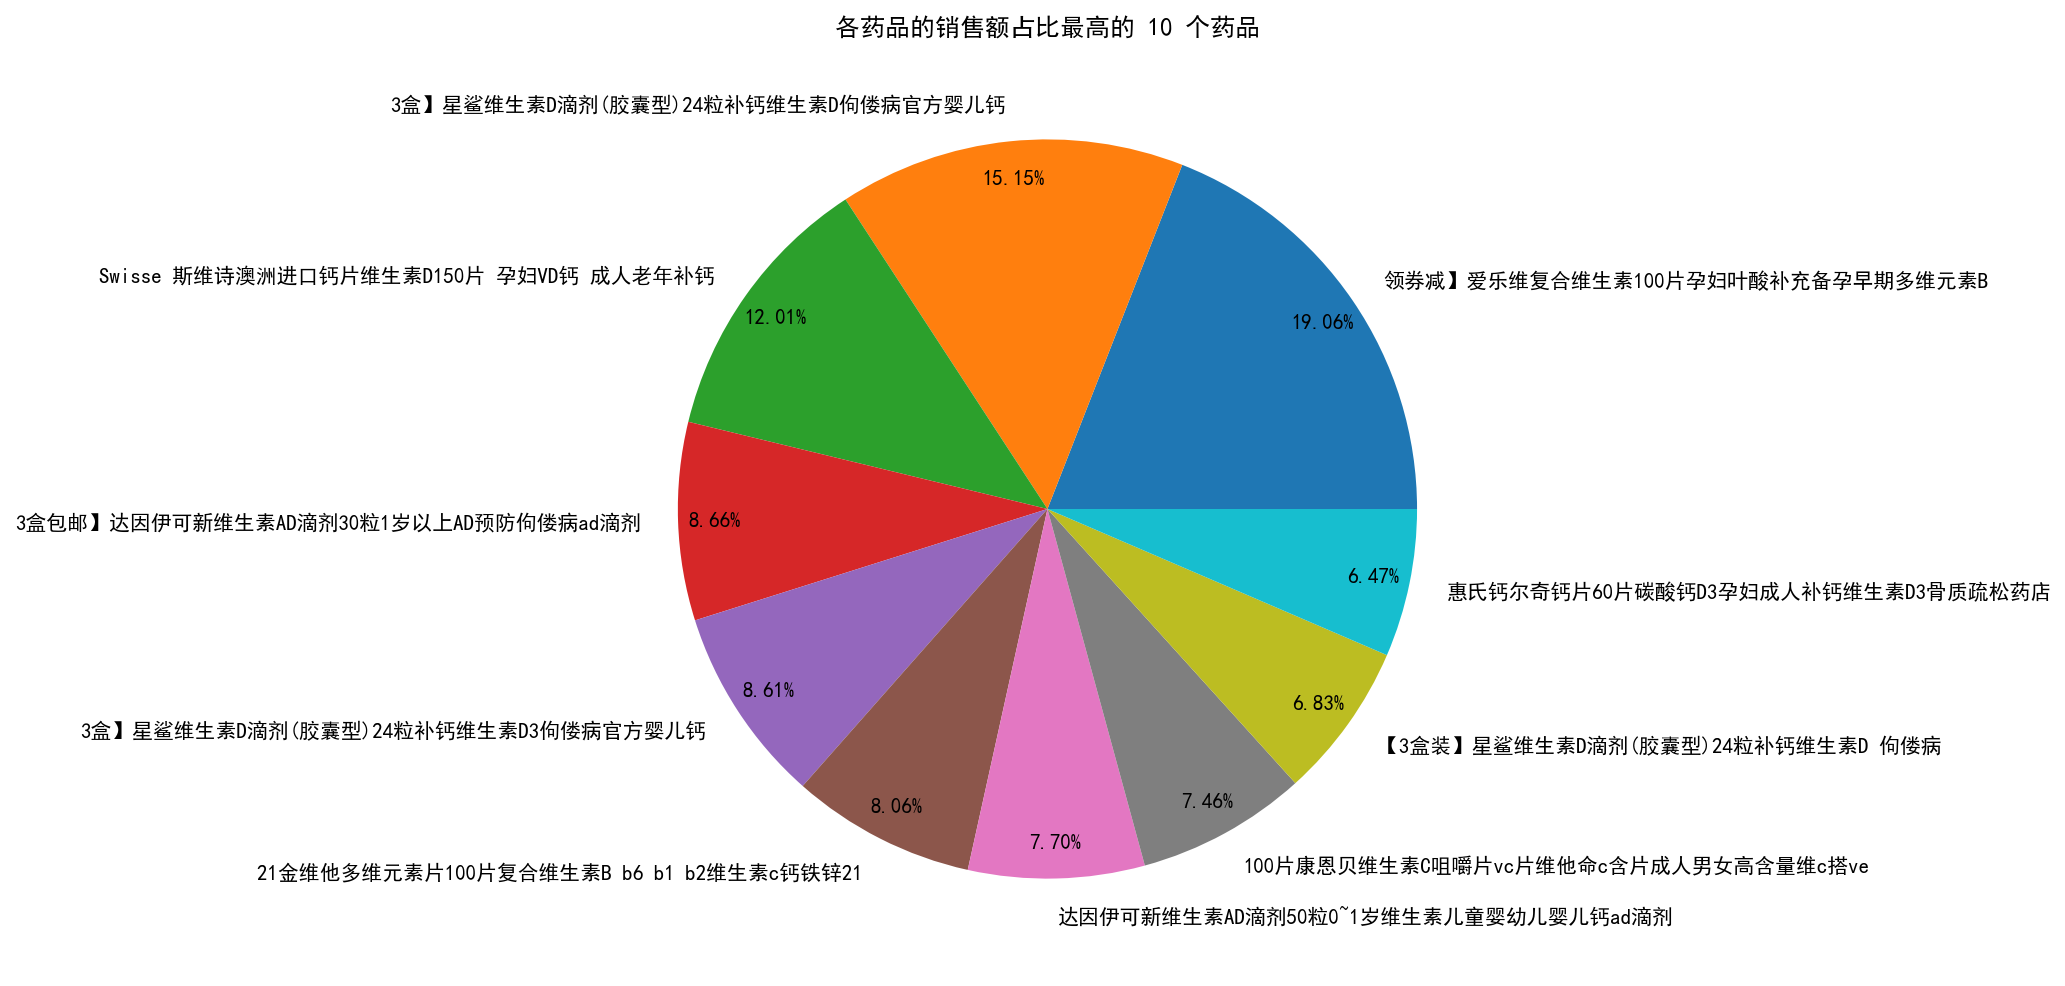

In [16]:
#饼状图
plt.figure(figsize=(16,8),dpi=150)
plt.rcParams['font.sans-serif'] = 'Simhei'
plt.pie(titleSoldSum[:10],autopct='%.2f%%',labels=titleName[:10],pctdistance=0.9)
plt.title('各药品的销售额占比最高的 10 个药品')
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\各药品的销售额占比最高的 10 个药品.jpg')

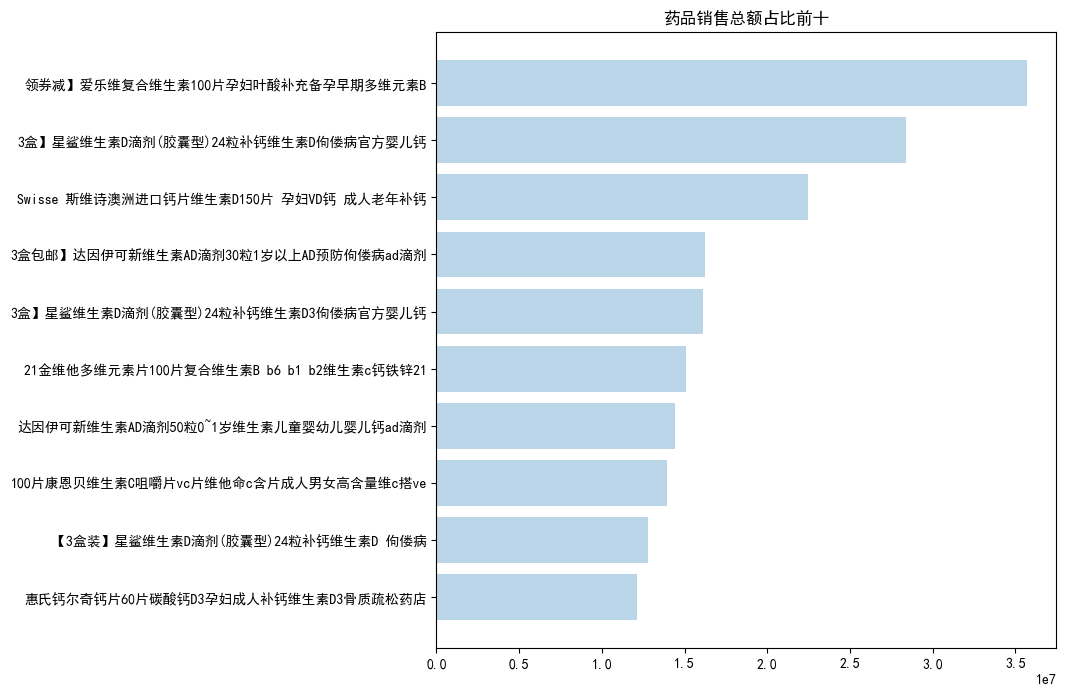

In [17]:
#画条形图
plt.figure(figsize=(8,8))
plt.barh(titleName[:10][::-1],titleSoldSum[:10][::-1],alpha=0.3)
plt.title('药品销售总额占比前十')
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\药品销售总额占比前十横条形图.jpg')

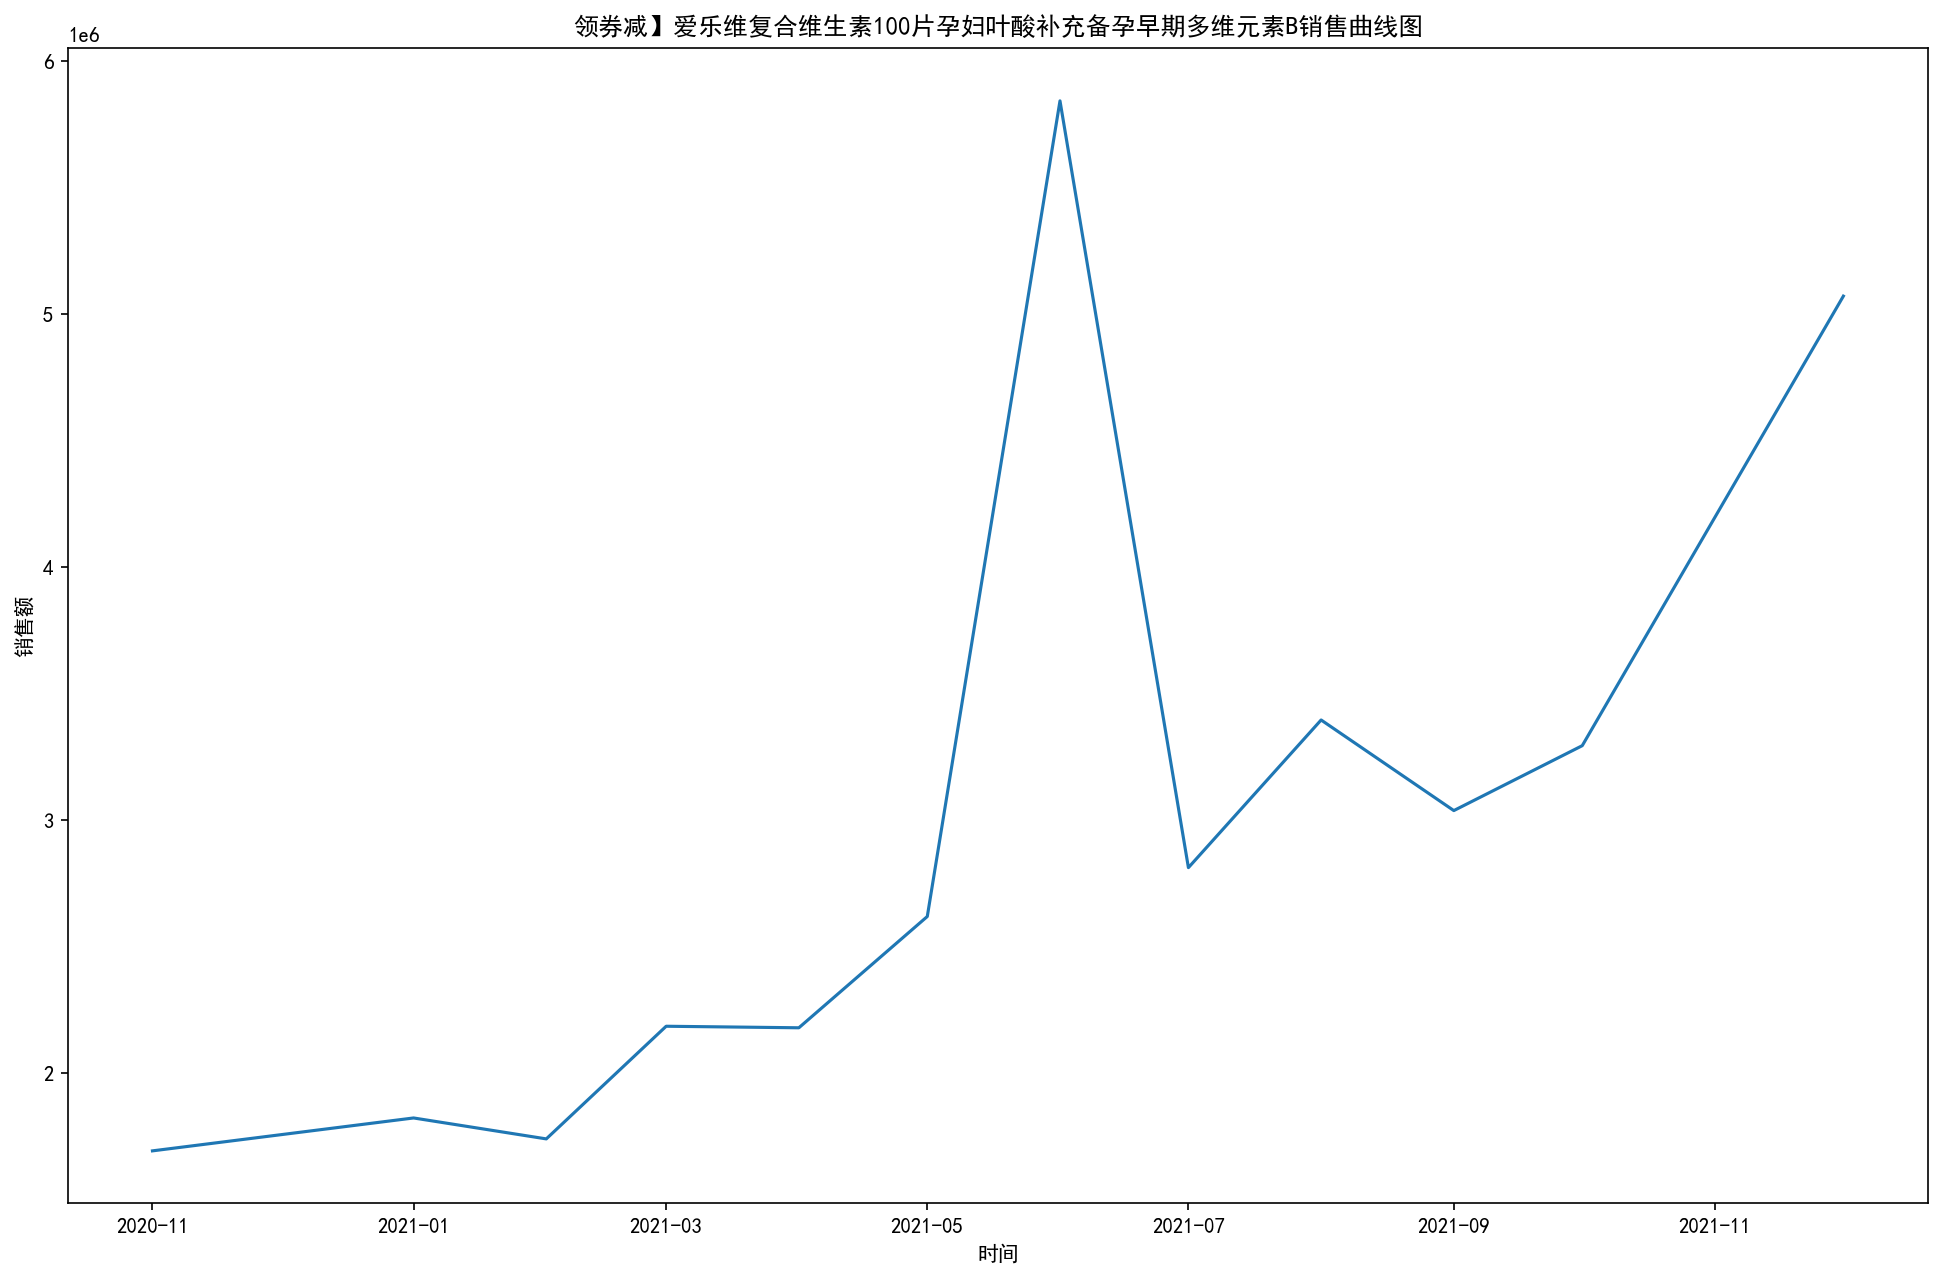

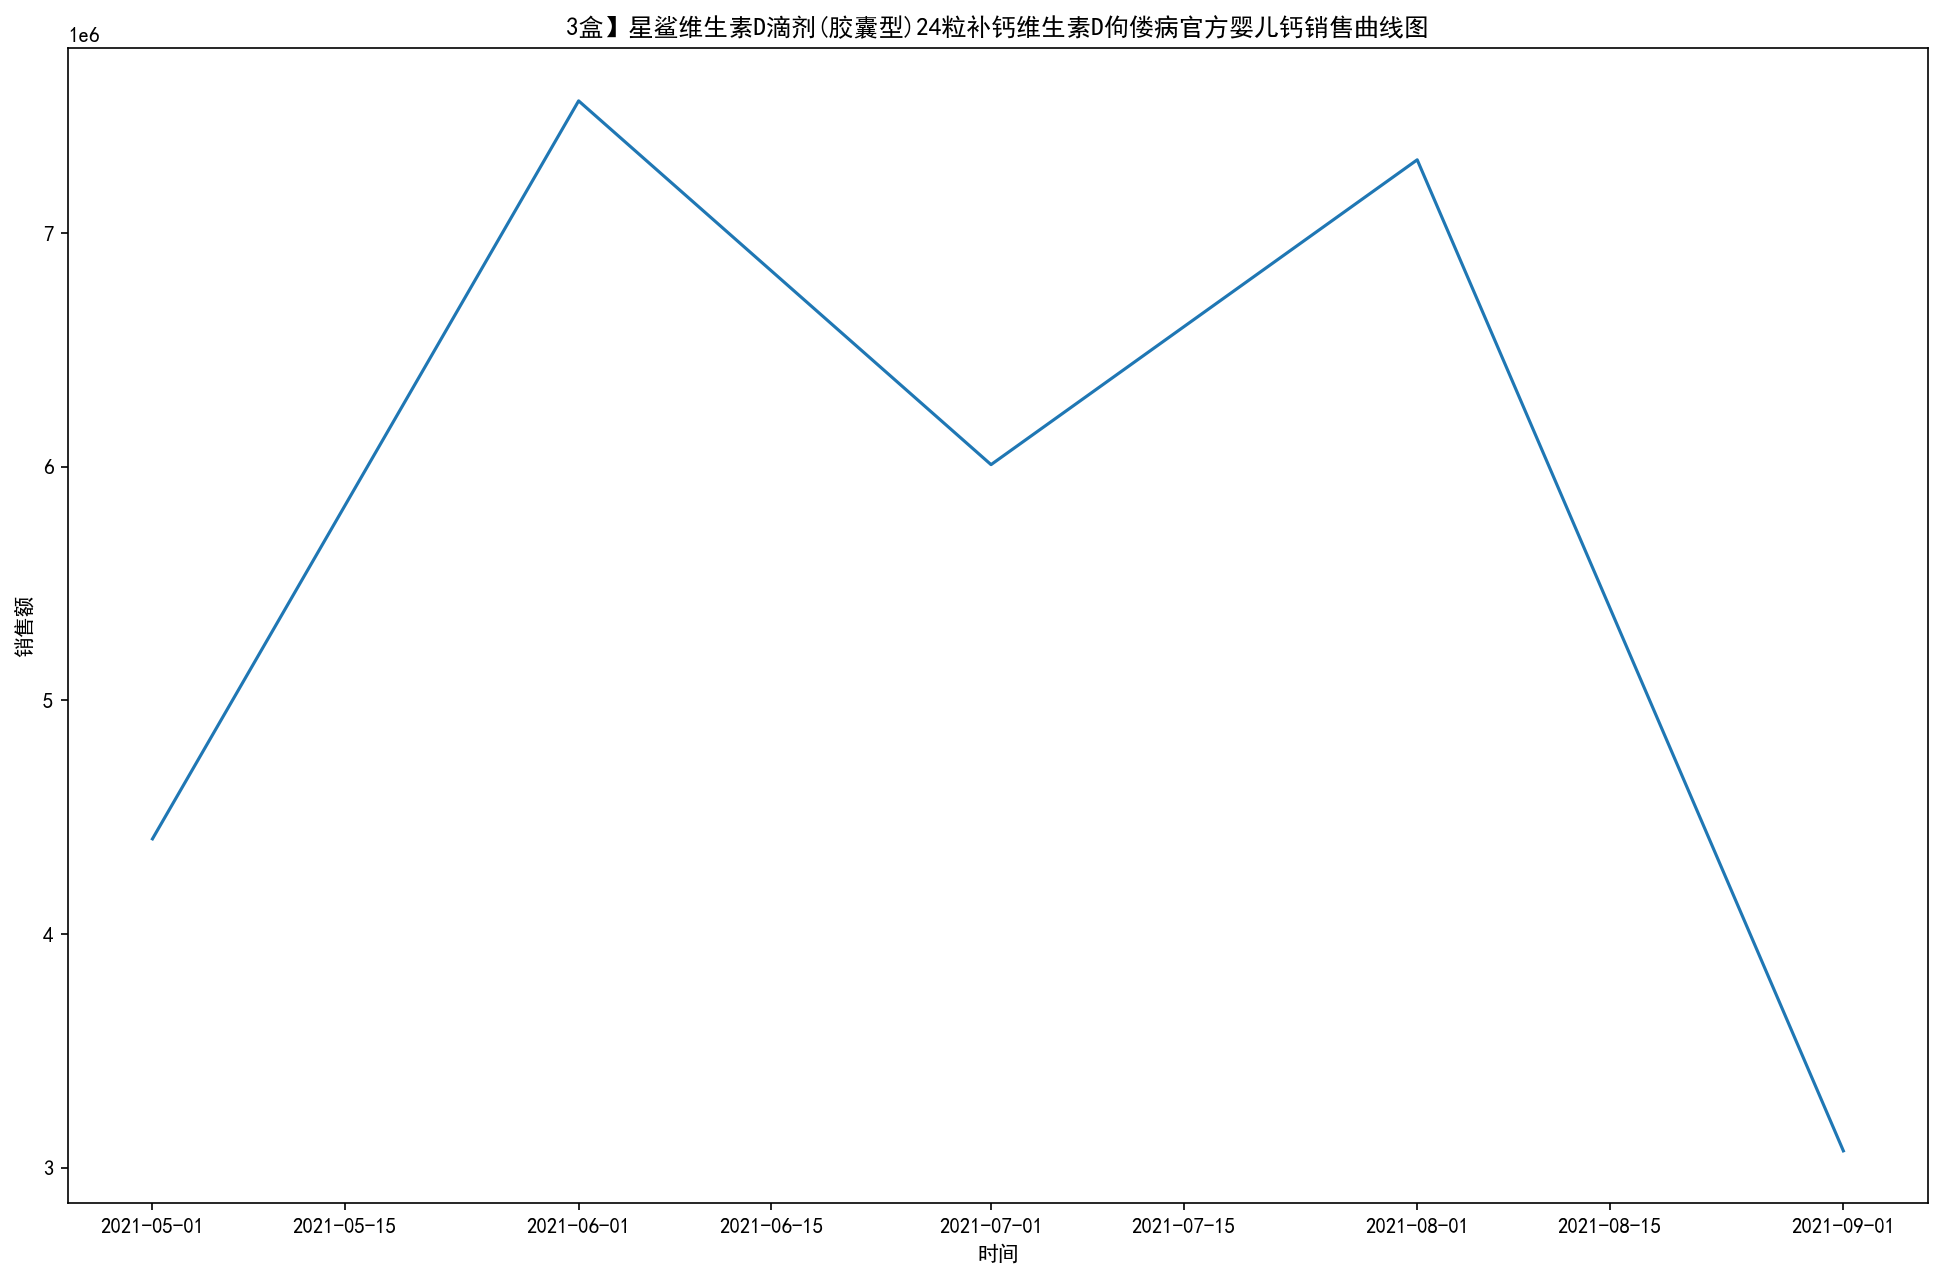

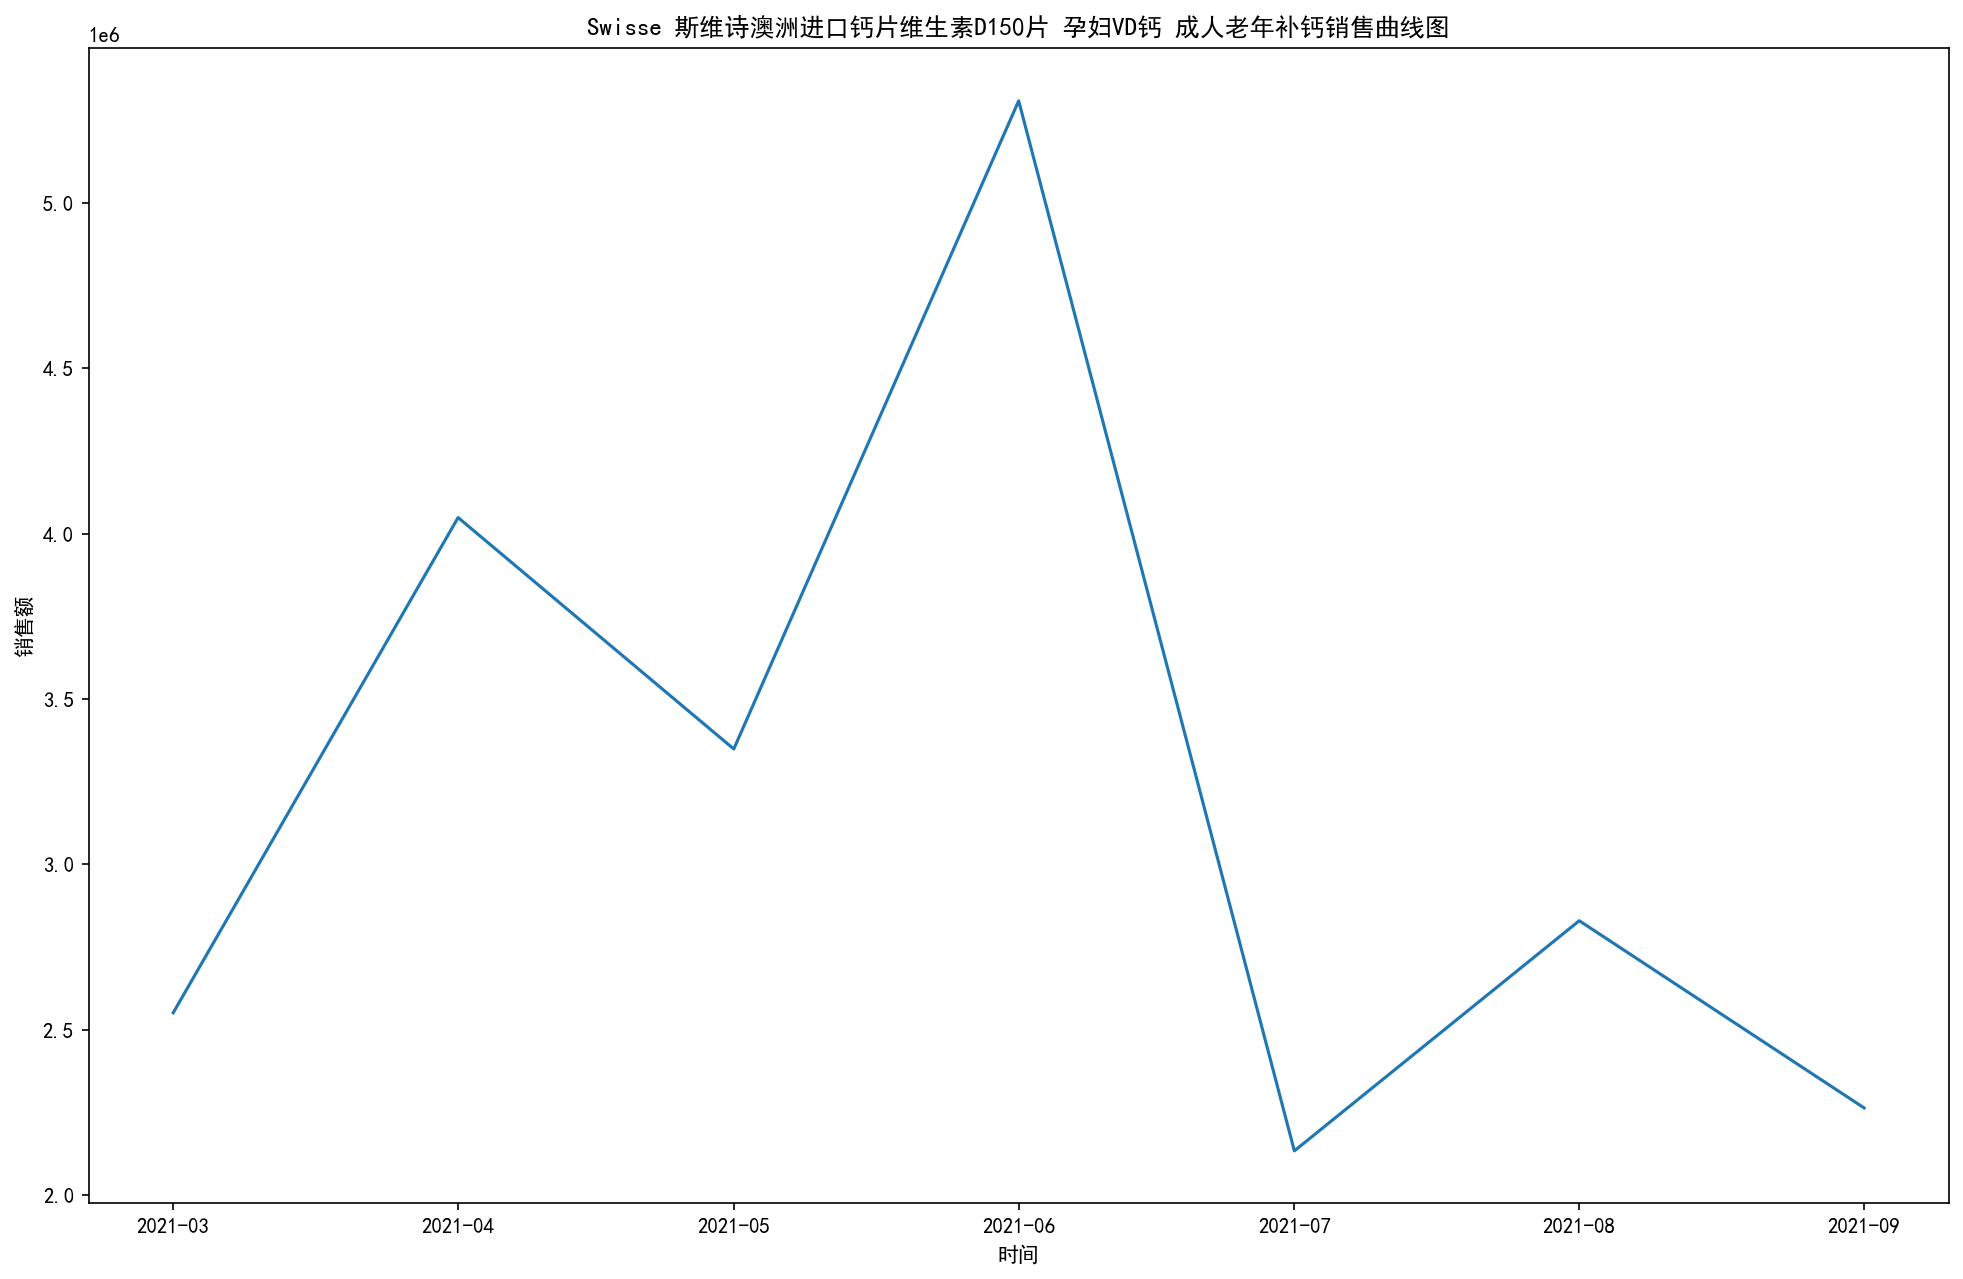

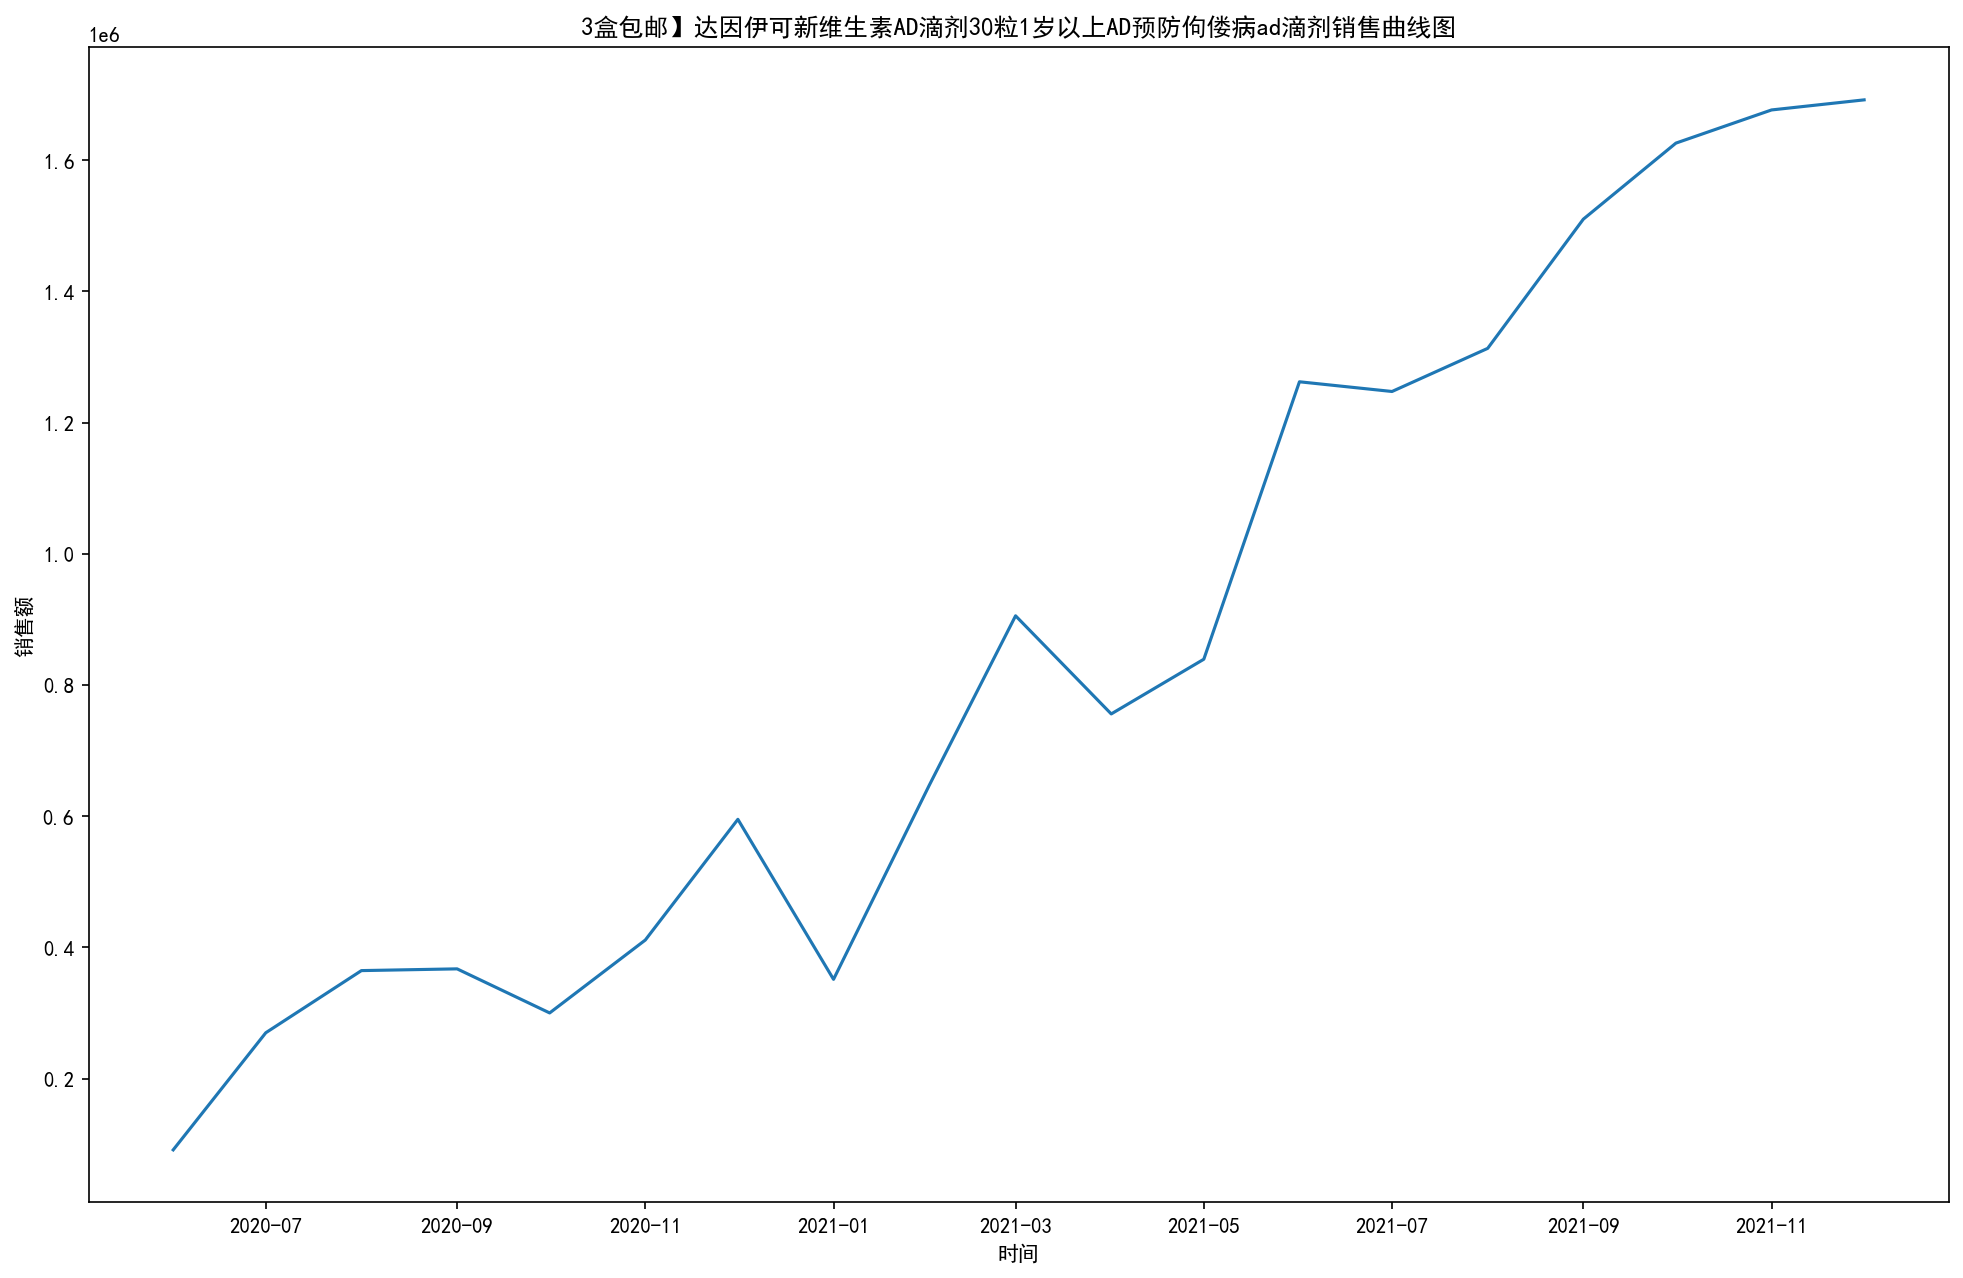

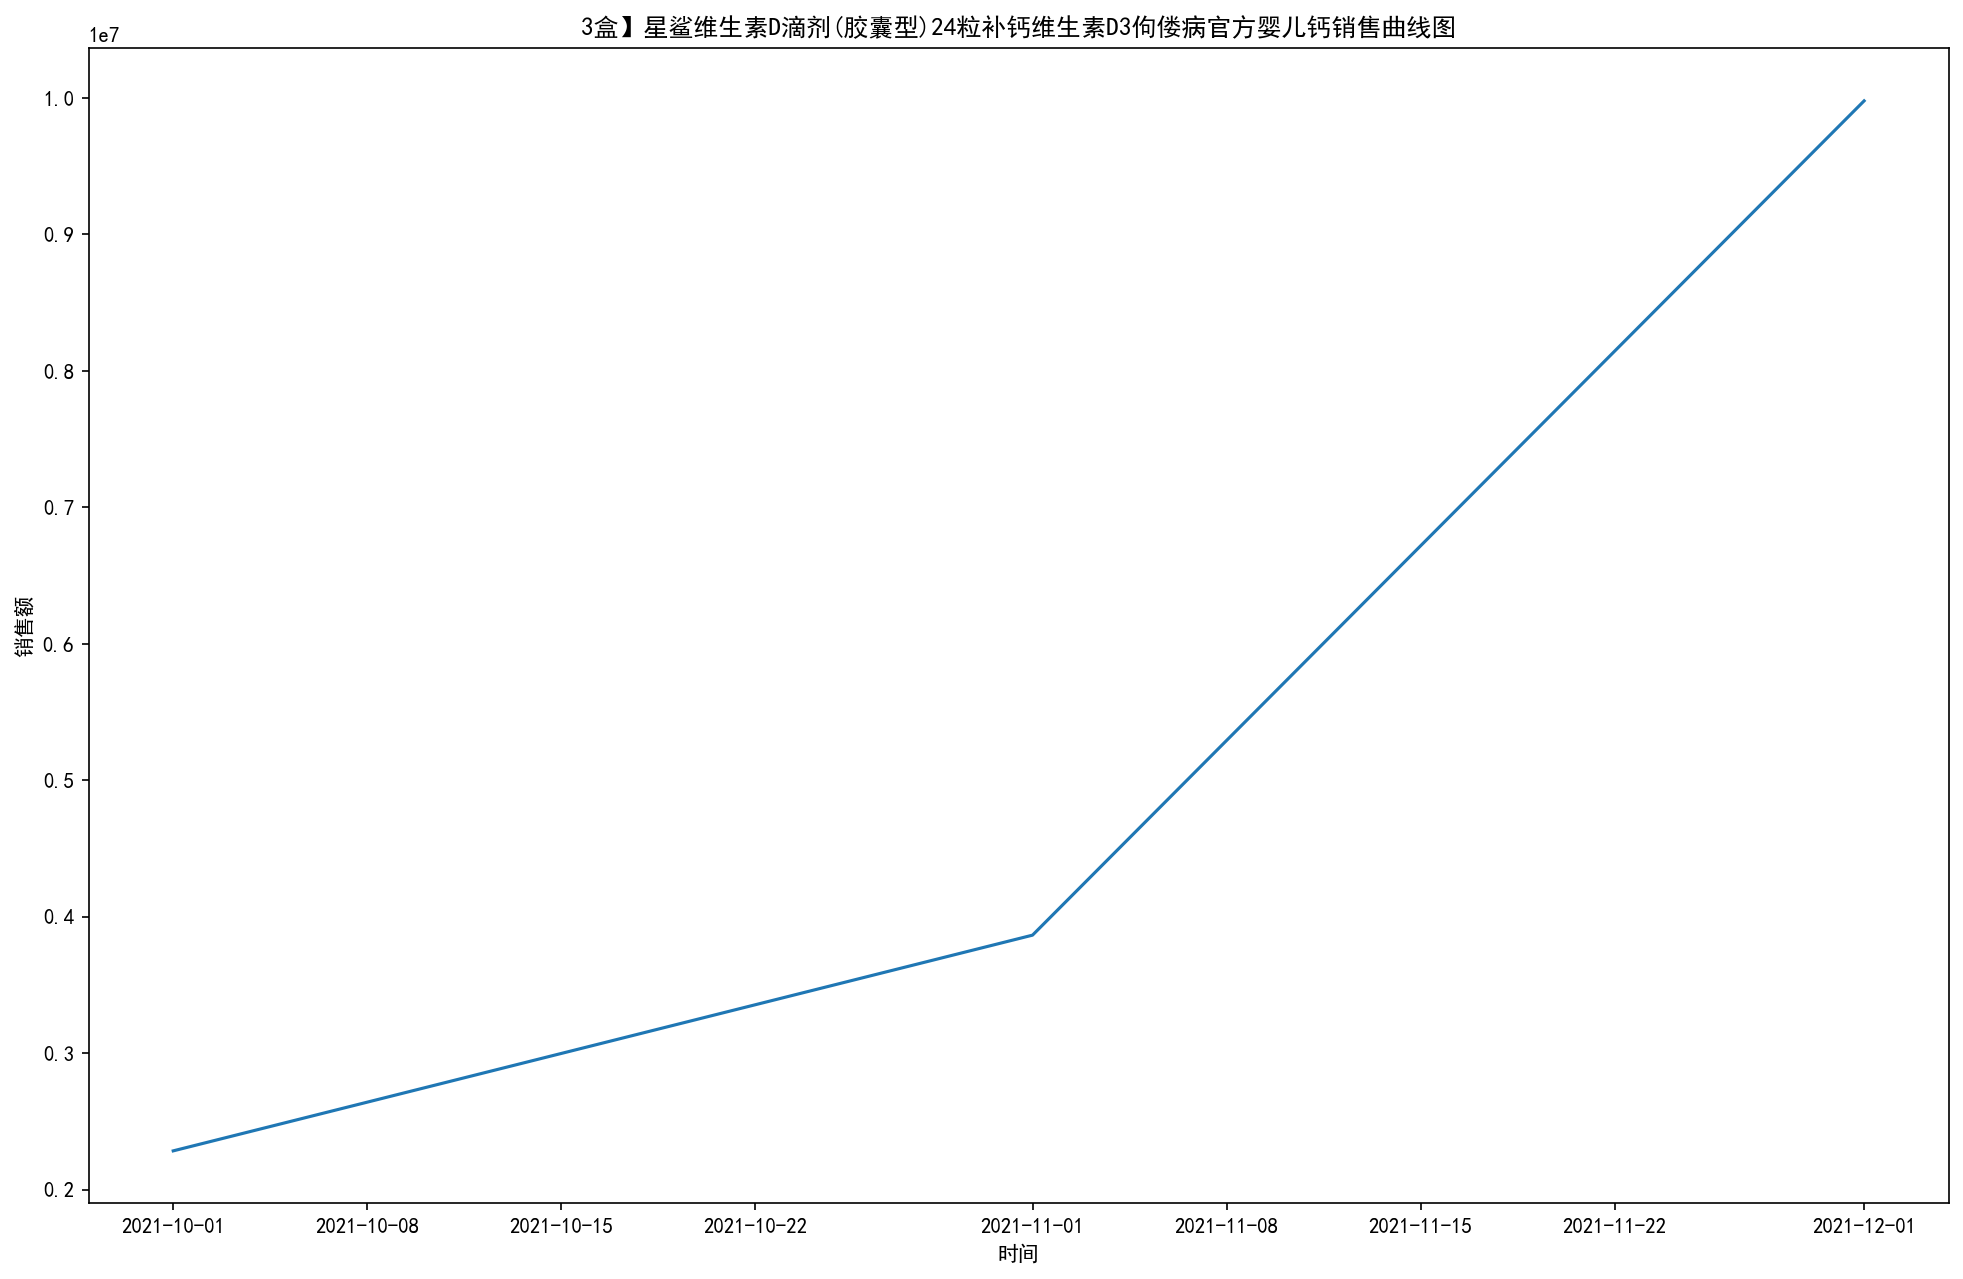

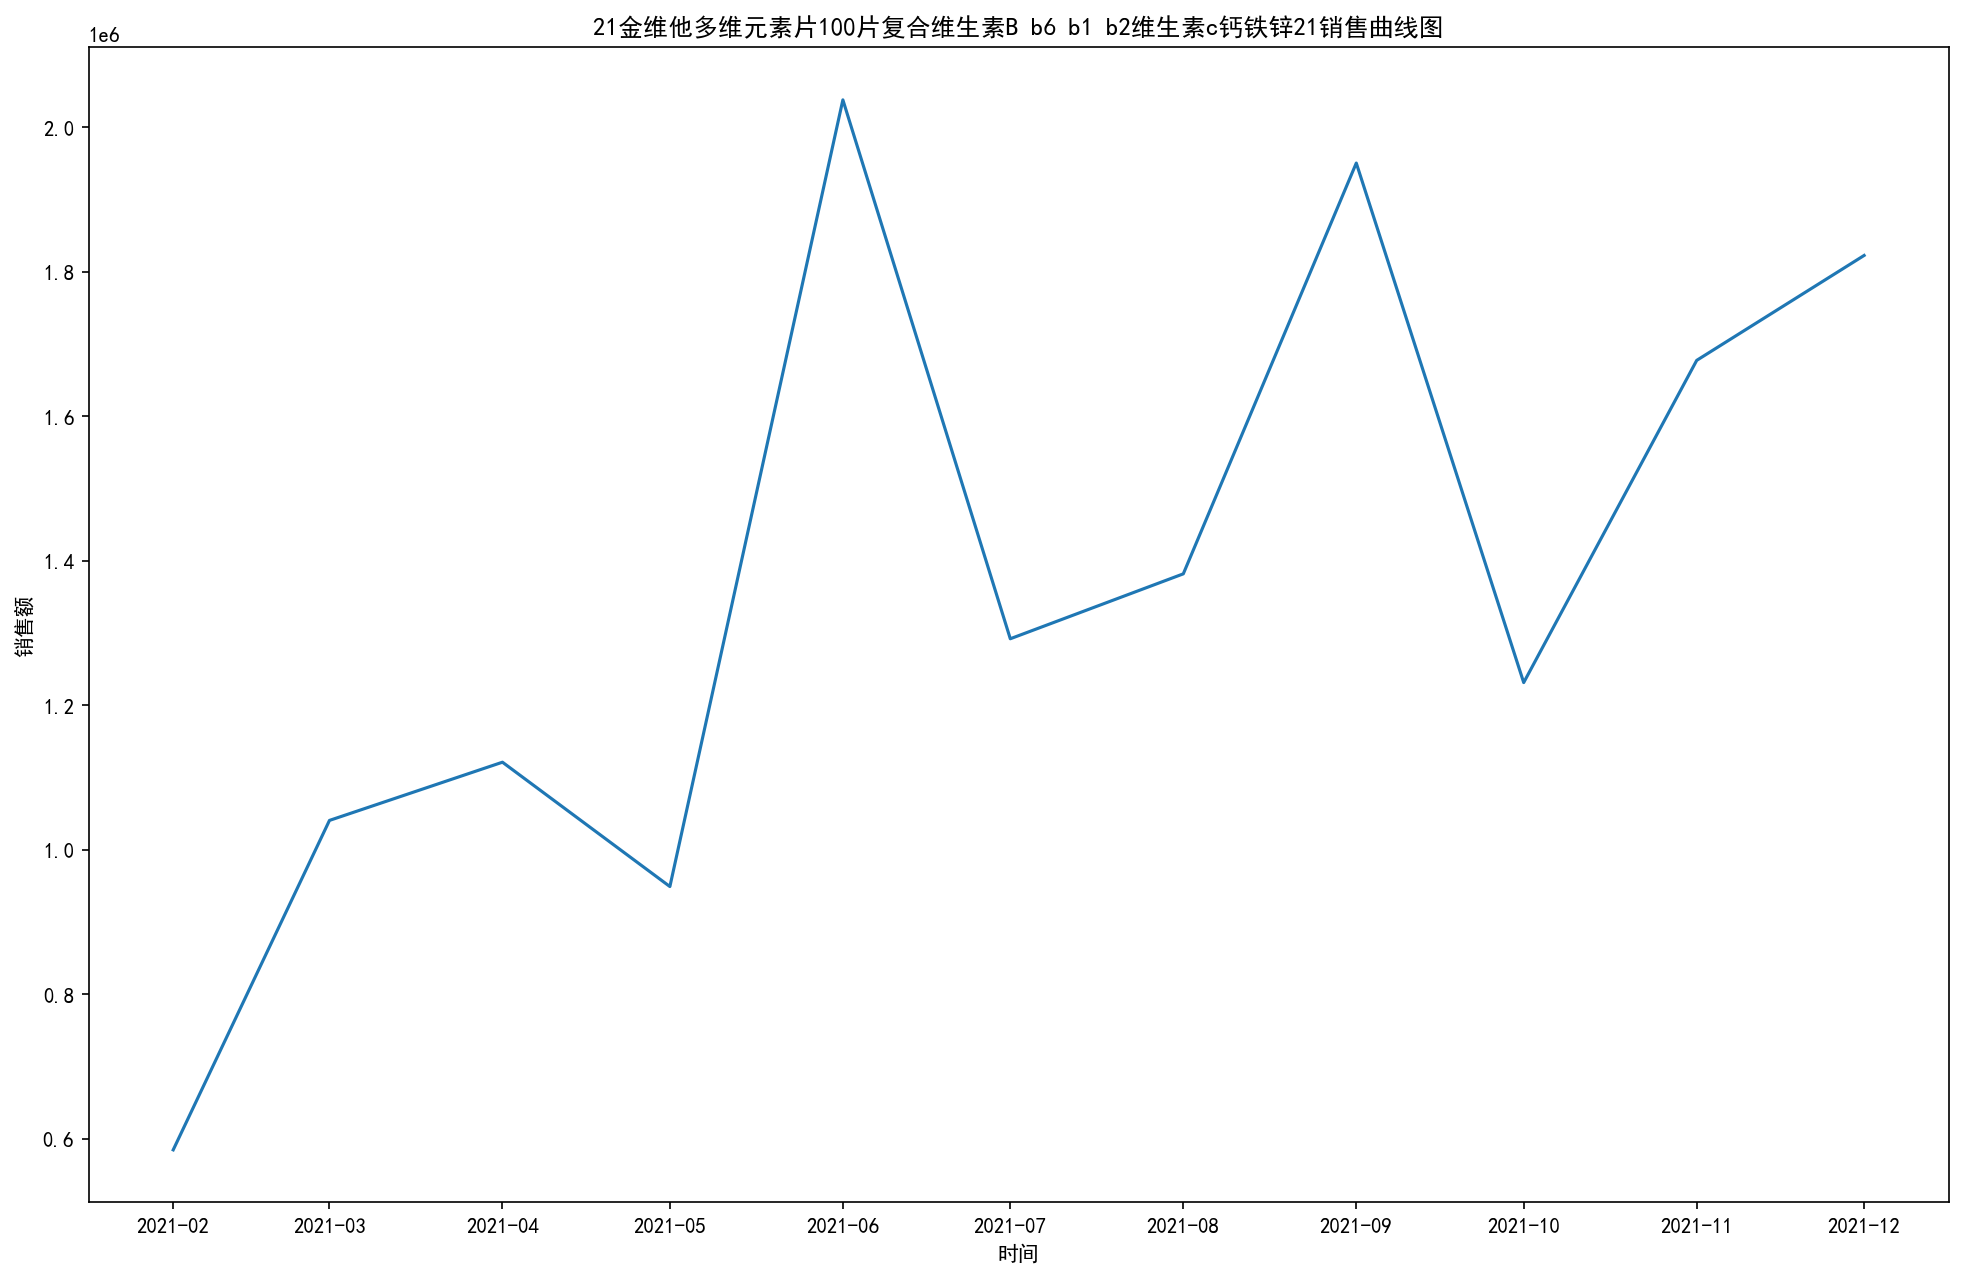

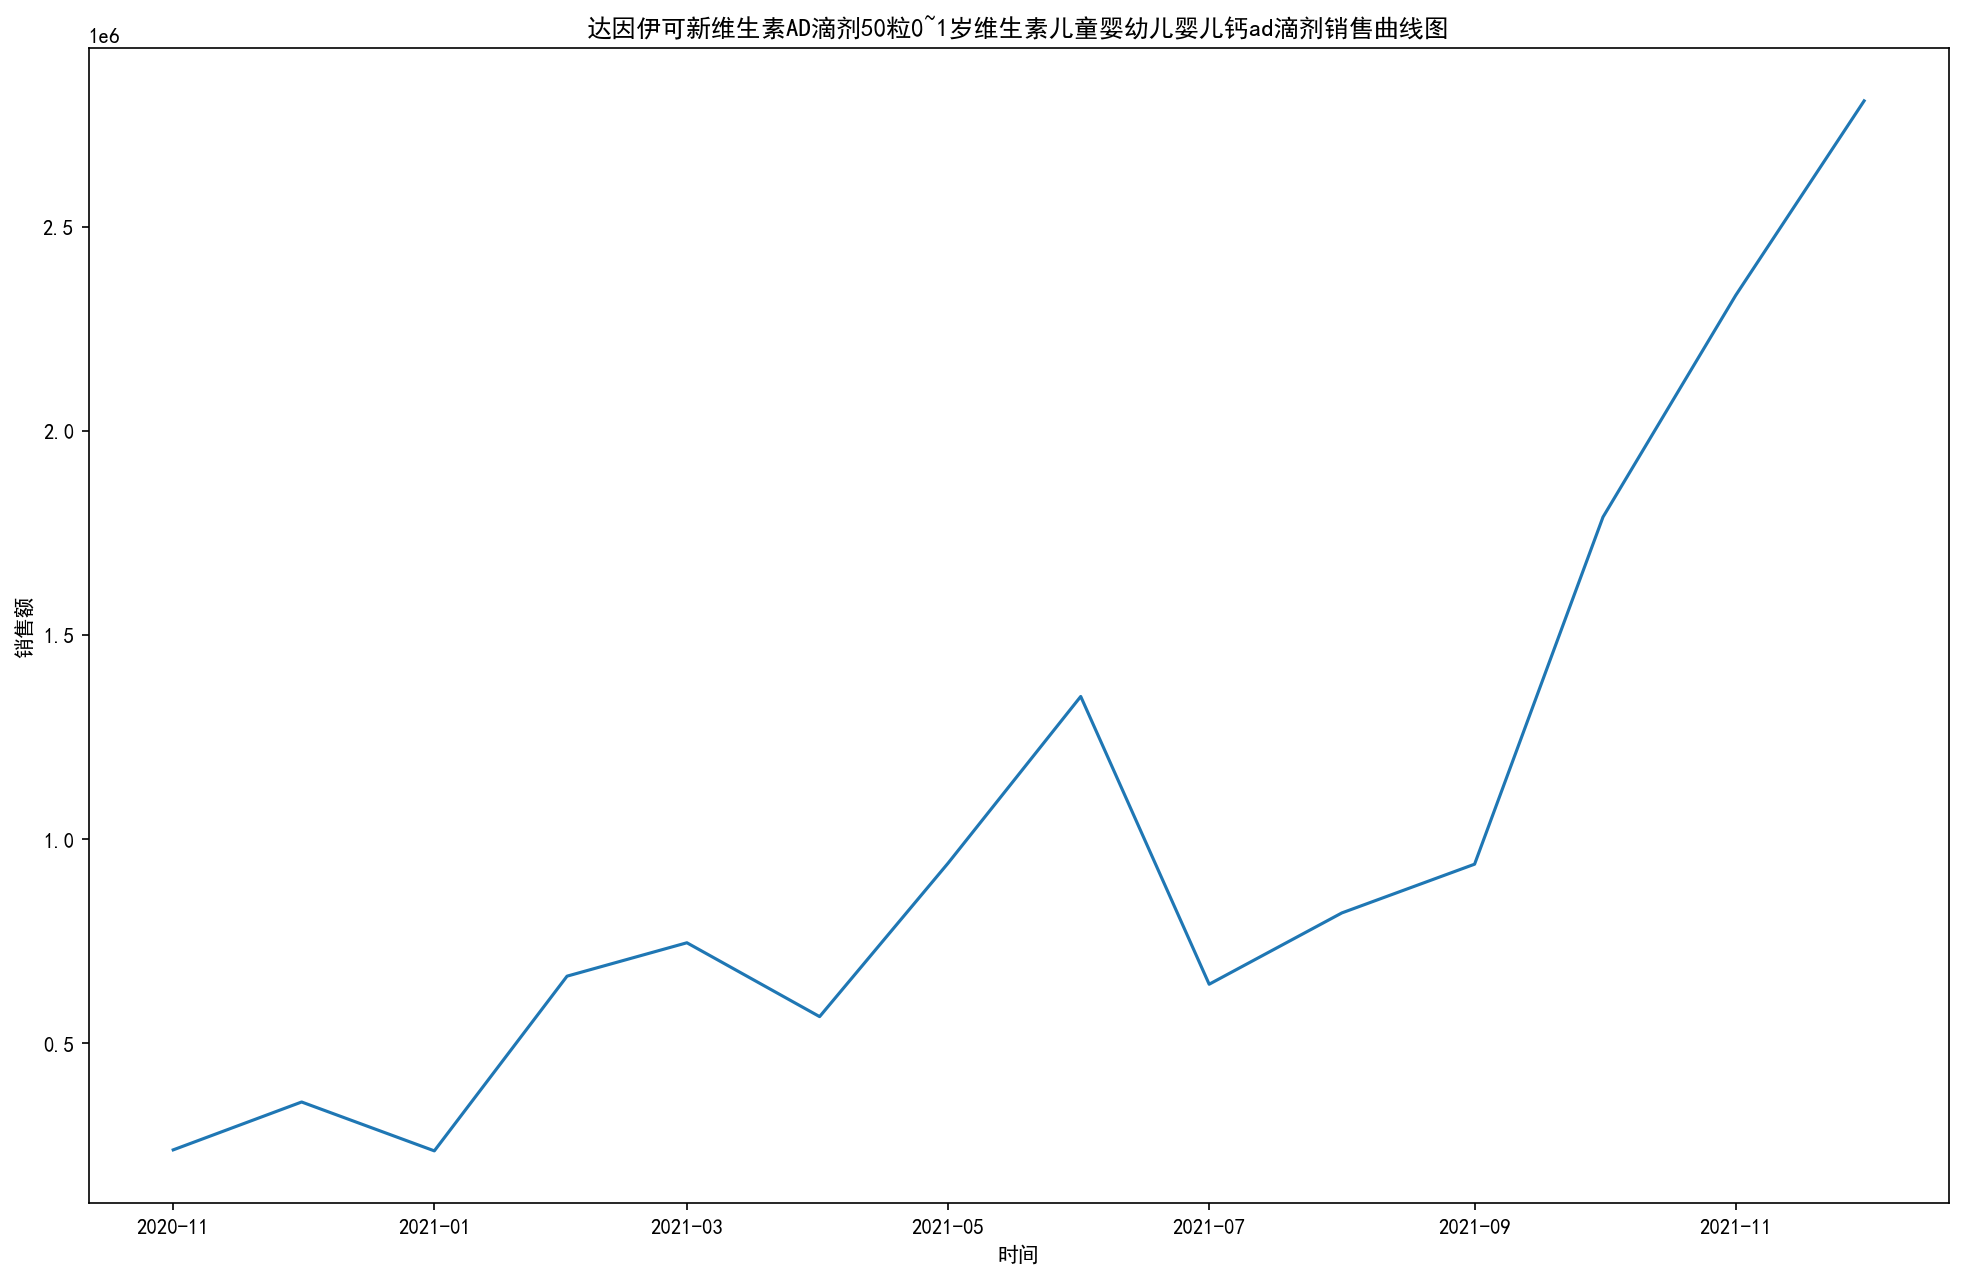

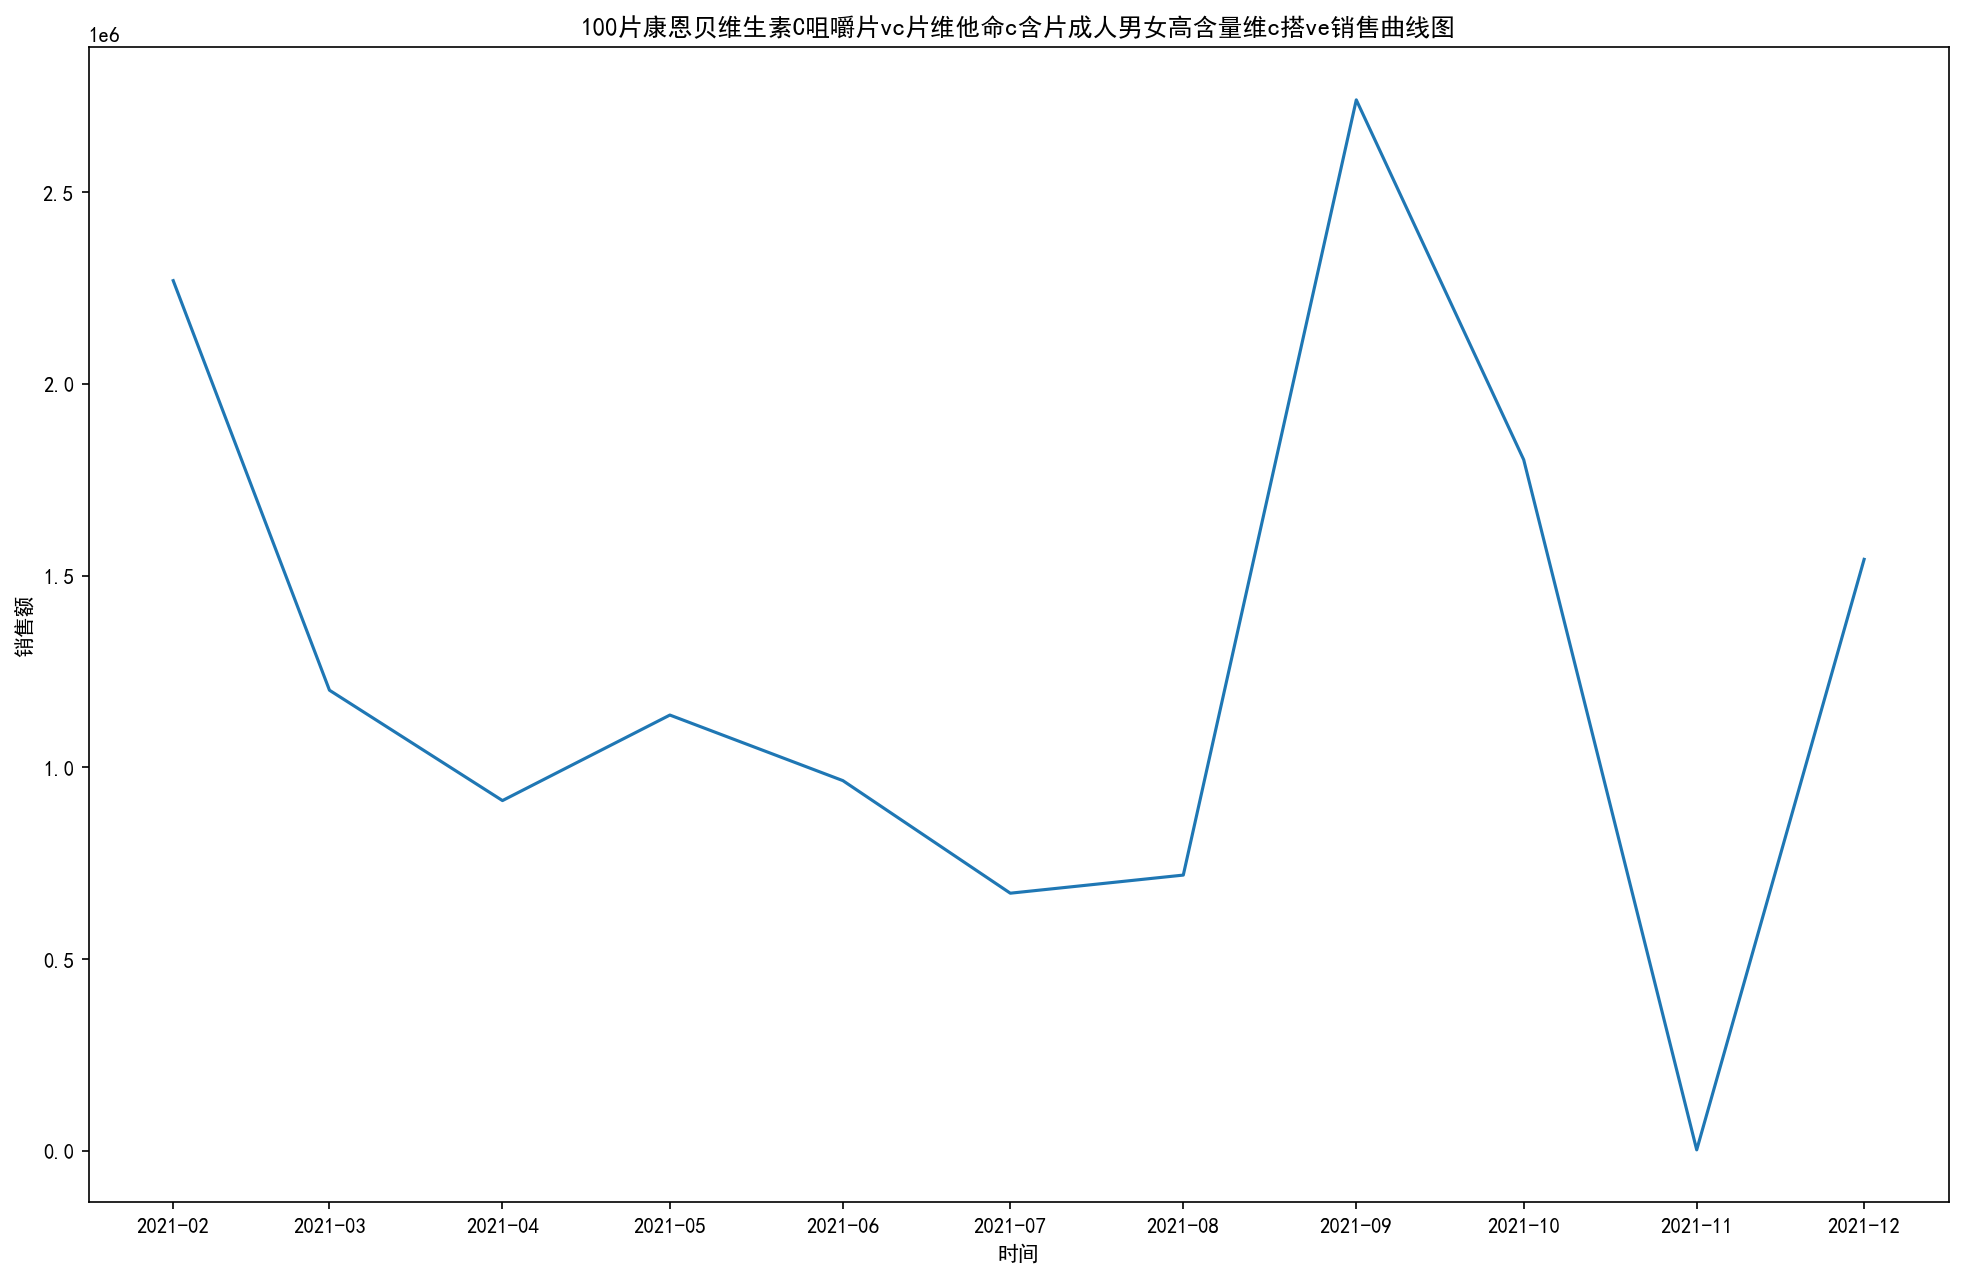

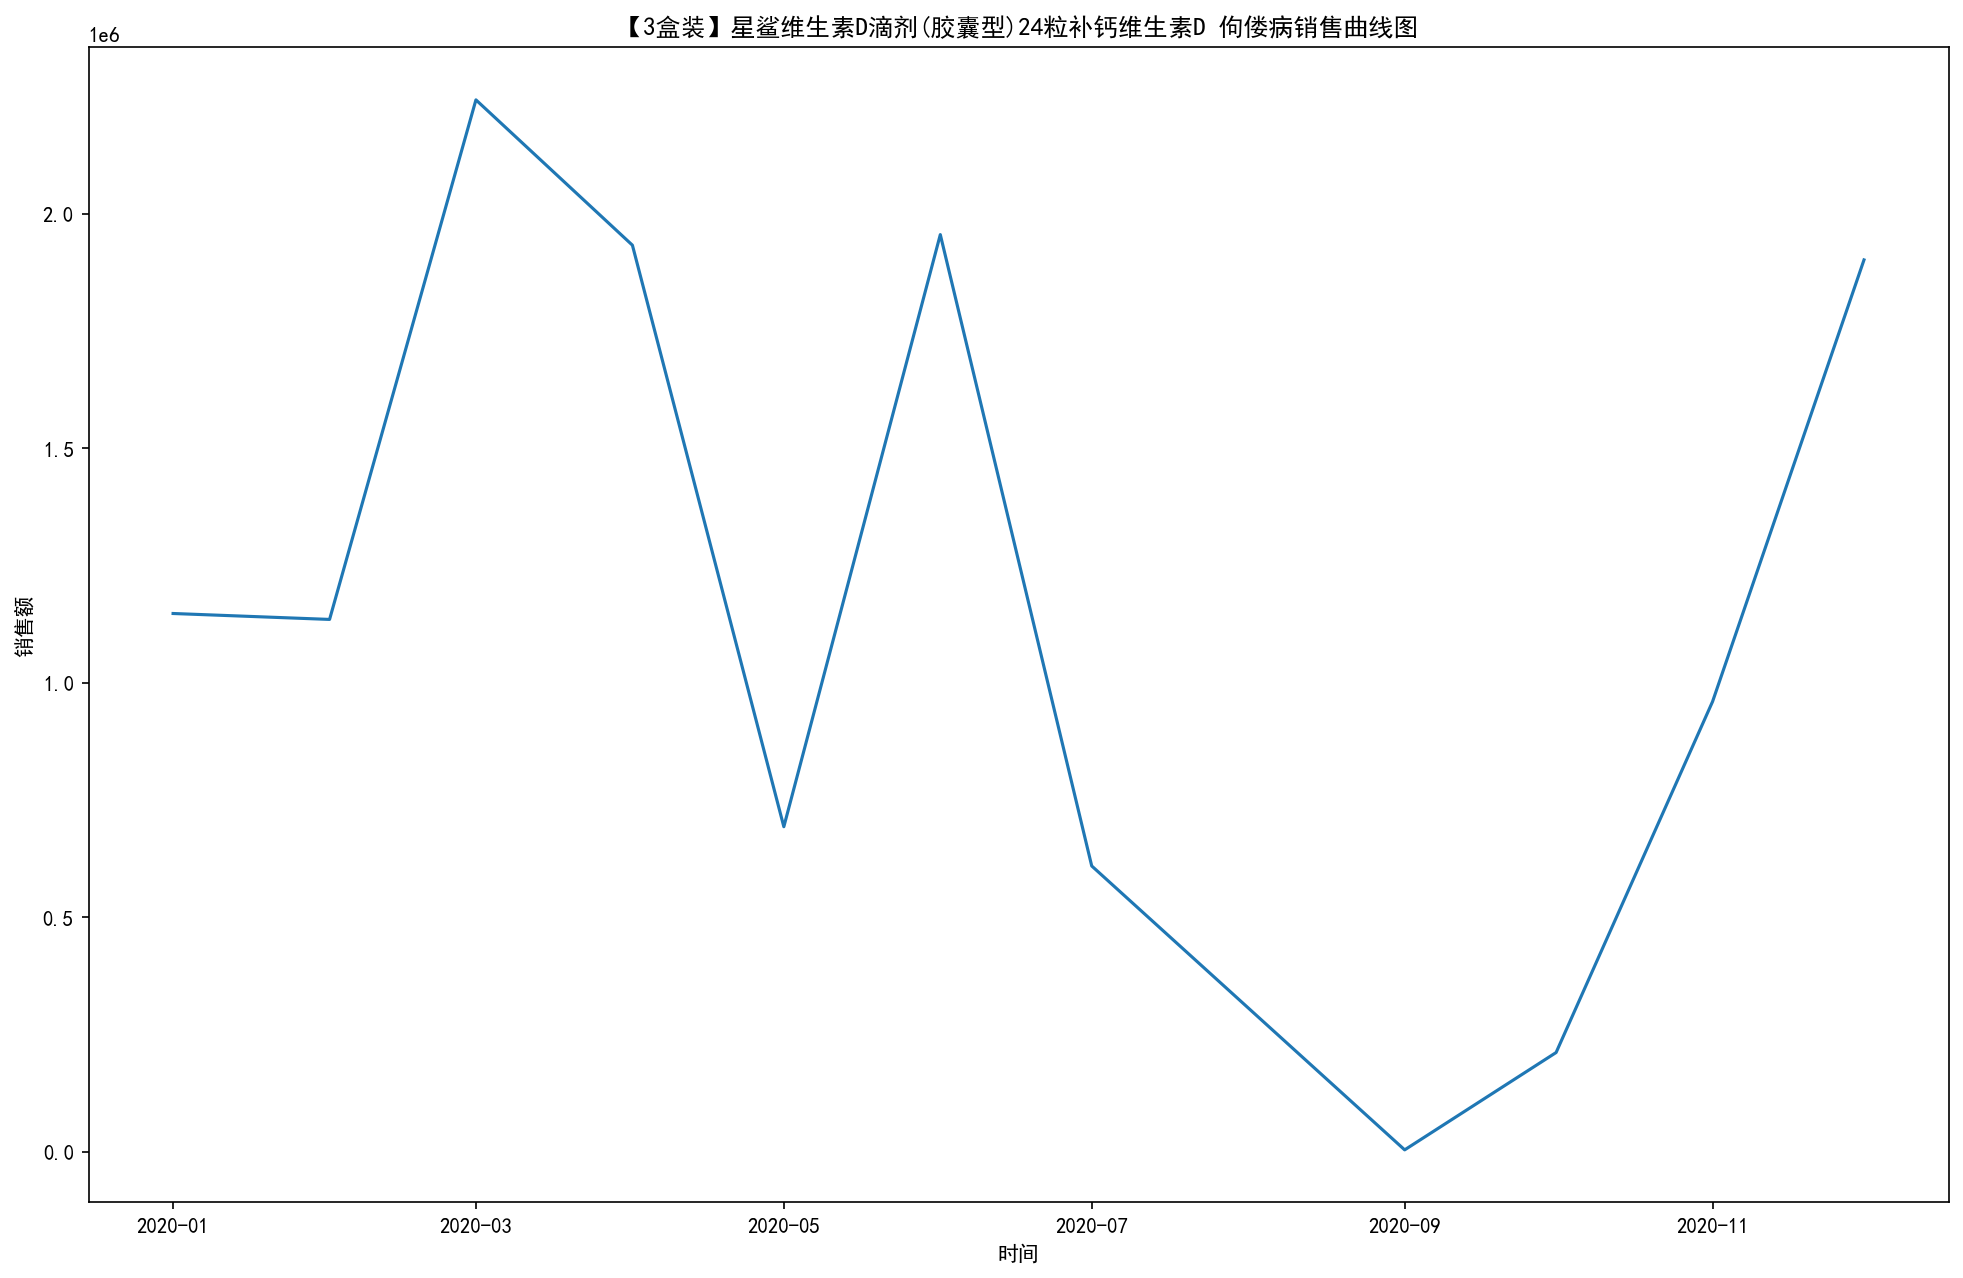

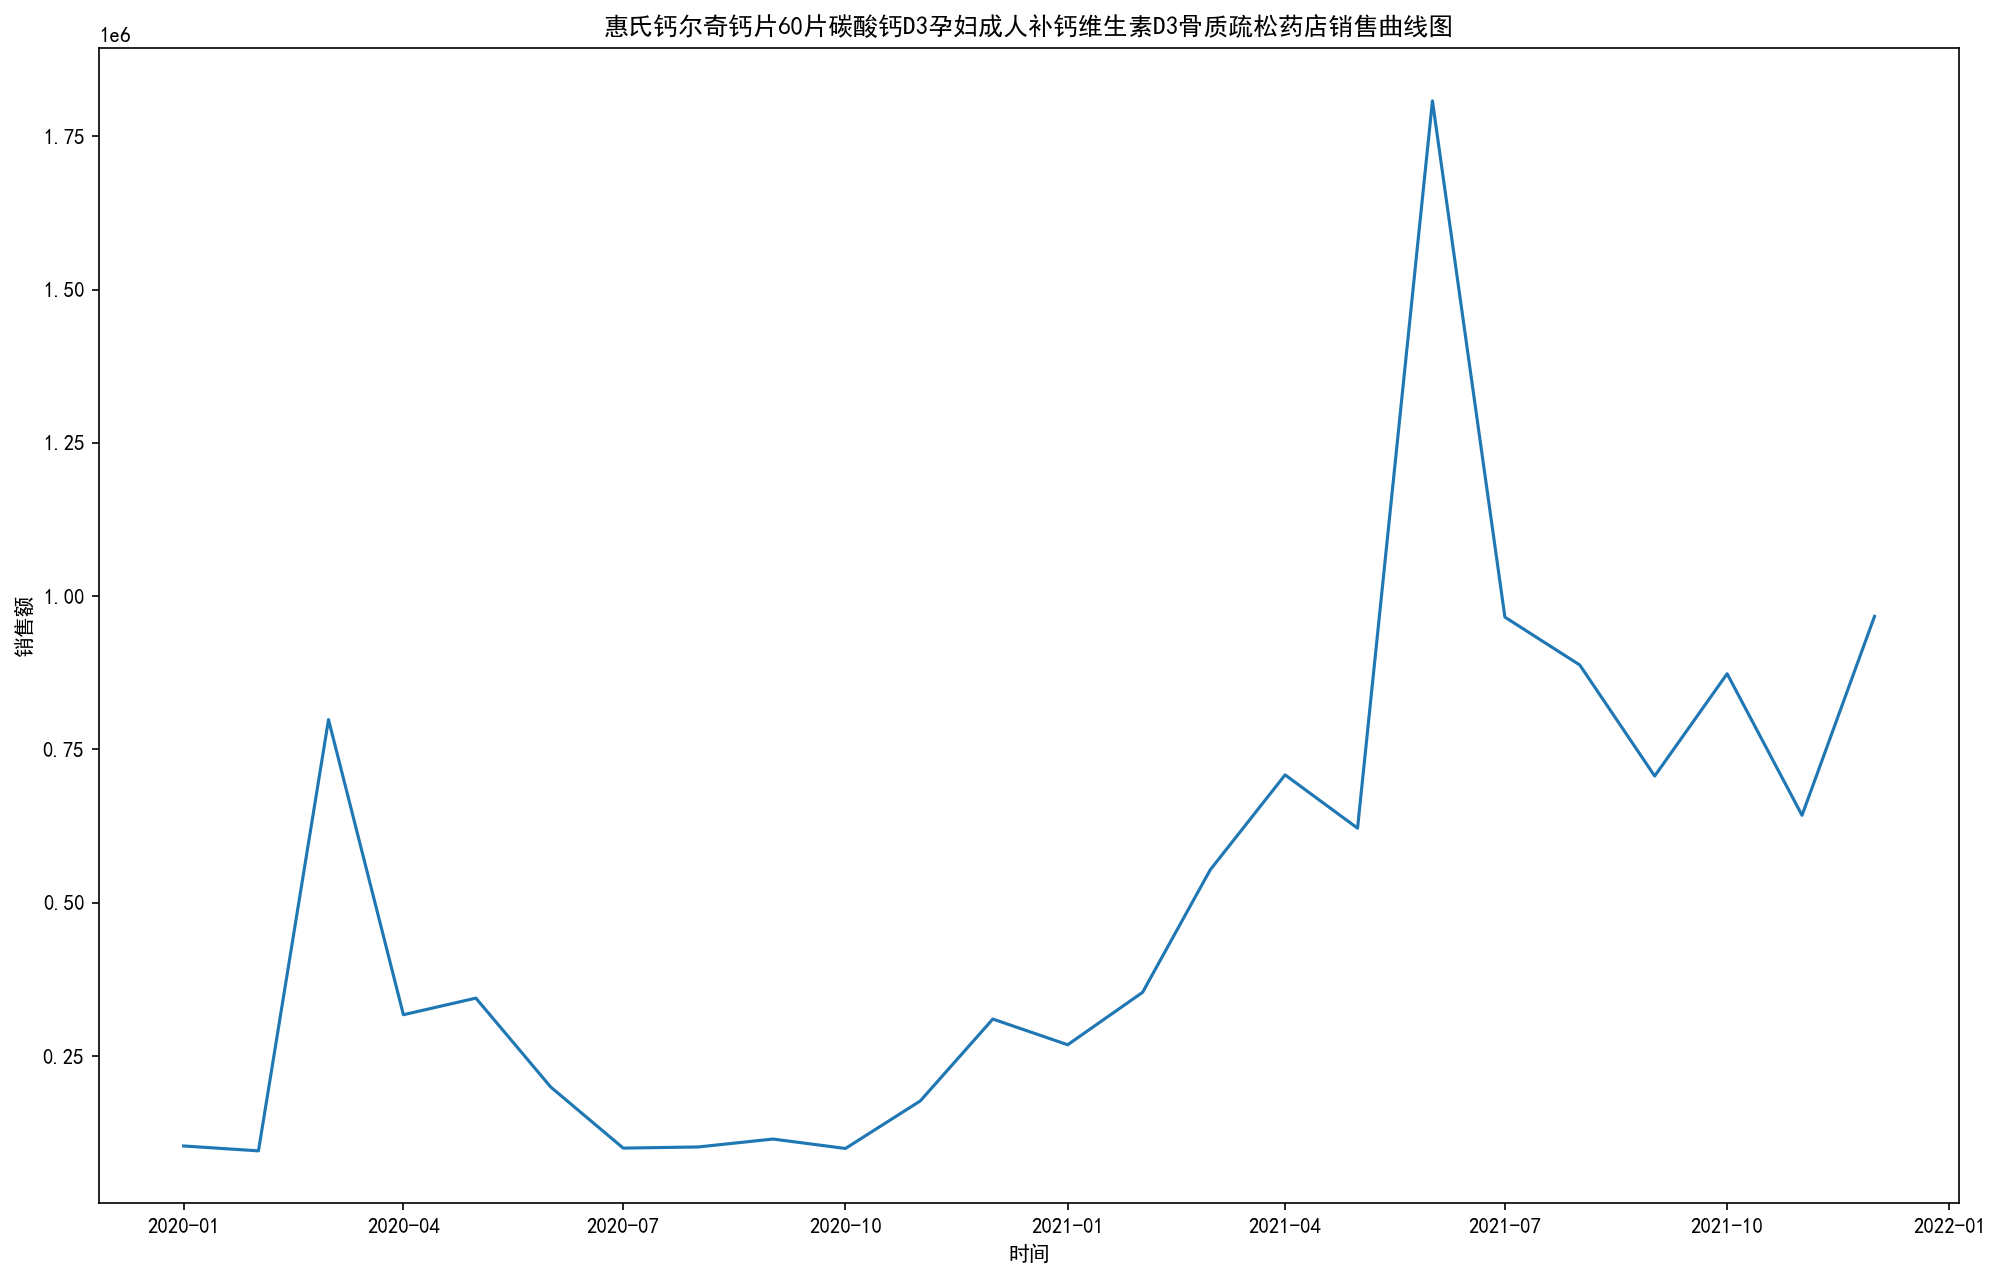

In [18]:
# 绘制这 10 个药品每月销售额曲线图。
for i in range(10):
    titleMaxSum = title_groups.get_group(titleName[i])# 10个药品分组
    MaxSum_t = titleMaxSum.sort_values('date_time')#按时间排序
    MaxSum_t = MaxSum_t.groupby('date_time')#按时间分组
    one_date = []
    one_date_sold_sum = []
    for date,group in MaxSum_t:
        one_date.append(date)
        one_date_sold_sum.append(group[["sold_sum"]].sum())
    plt.figure(figsize=(16,10),dpi=150)
    plt.xlabel('时间')
    plt.ylabel('销售额')
    plt.plot(one_date,one_date_sold_sum)
    plt.title(titleName[i]+'销售曲线图')
    plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\药店每月销售额曲线图.jpg')

第三题：
<br>对所有药品品牌进行分析，一共包含多少个品牌，各品牌的销售额占比如何？给出销售额占比最高的 10 个品牌，并分析这 10 个品牌销售较好的原因？

In [19]:
print(data.columns)

Index(['date_time', 'id', 'shop_name', 'title', 'sku_name', 'price', 'sold',
       'discount', 'brand', 'parameter', 'sold_sum', 'pre_sold_sum'],
      dtype='object')


In [20]:
# 一共包含多少个品牌
brand_groups = data.groupby('brand')
print("一共包含",len(brand_groups),"个品牌")

一共包含 465 个品牌


In [21]:
#各品牌的销售额占比如何
brandName = []
brandSoldSum = []
for name,group in brand_groups:
    brandName.append(name)
    brandSoldSum.append(group.sold_sum.sum())

print(name," 销售额:",group.sold_sum.sum()," 元") 

龙牡  销售额: 134.90001  元


In [22]:
# 按品牌销售额排序
x = dict(zip(brandName,brandSoldSum))
c=sorted(x.items(),key = lambda x: x[1],reverse=True)
brandName = [x[0] for x in c]
brandSoldSum = [x[1] for x in c]
print(brandName[:10],brandSoldSum[:10])

['elevit/爱乐维', 'FANCL HealthScience', 'BY－HEALTH/汤臣倍健', 'CENTRUM/善存', 'BLACKMORES/澳佳宝', 'Nature Made', '养生堂', 'FANCL', 'D－Cal/迪巧', 'vitafusion'] [np.float32(34490860.0), np.float32(15642299.0), np.float32(15259531.0), np.float32(13470389.0), np.float32(2568520.0), np.float32(2123870.8), np.float32(1802496.8), np.float32(1708335.9), np.float32(1445422.2), np.float32(1142189.8)]


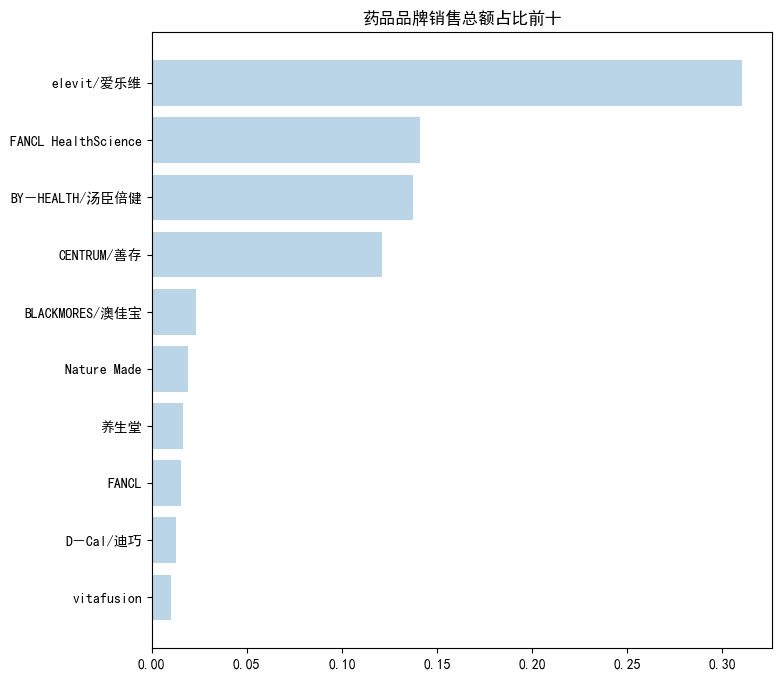

In [23]:
#各品牌的销售额占比
#给出销售额占比最高的 10 个品牌
brandSoldSumtotal = sum(brandSoldSum)
brandSoldSumPercent = [x/brandSoldSumtotal for x in brandSoldSum]
mylist = [brandName,brandSoldSum,brandSoldSumPercent]
mymatrix = np.asmatrix(mylist)
mymatrix = mymatrix.T
xlxs_title = pd.DataFrame(mymatrix,columns=['品牌名称', '品牌销售额', '品牌销售额占比'])
xlxs_title_rank10 = pd.DataFrame(mymatrix[:10],columns=['品牌名称', '品牌销售额', '品牌销售额占比'])
#存入excel
xlxs_title.to_excel(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\各品牌的销售额占比.xlsx', sheet_name='各品牌的销售额占比')
xlxs_title_rank10.to_excel(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\销售额占比最高的10个品牌.xlsx', sheet_name='销售额占比最高的 10 个品牌')

#画条形图
plt.figure(figsize=(8,8))
plt.barh(brandName[:10][::-1],brandSoldSumPercent[:10][::-1],alpha=0.3)
plt.title('药品品牌销售总额占比前十')
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\药品品牌销售总额占比前十要点横条形图.jpg')

In [24]:
#并分析这 10 个品牌销售较好的原因？
#价格上
mylist = [brandName,brandSoldSum,brandSoldSumPercent]
mymatrix = np.asmatrix(mylist)
mymatrix = mymatrix.T
print(mymatrix[:10])

[['elevit/爱乐维' '34490860.0' '0.3105258']
 ['FANCL HealthScience' '15642299.0' '0.14082971']
 ['BY－HEALTH/汤臣倍健' '15259531.0' '0.1373836']
 ['CENTRUM/善存' '13470389.0' '0.12127571']
 ['BLACKMORES/澳佳宝' '2568520.0' '0.023124728']
 ['Nature Made' '2123870.8' '0.019121492']
 ['养生堂' '1802496.8' '0.016228119']
 ['FANCL' '1708335.9' '0.015380376']
 ['D－Cal/迪巧' '1445422.2' '0.013013329']
 ['vitafusion' '1142189.8' '0.010283287']]


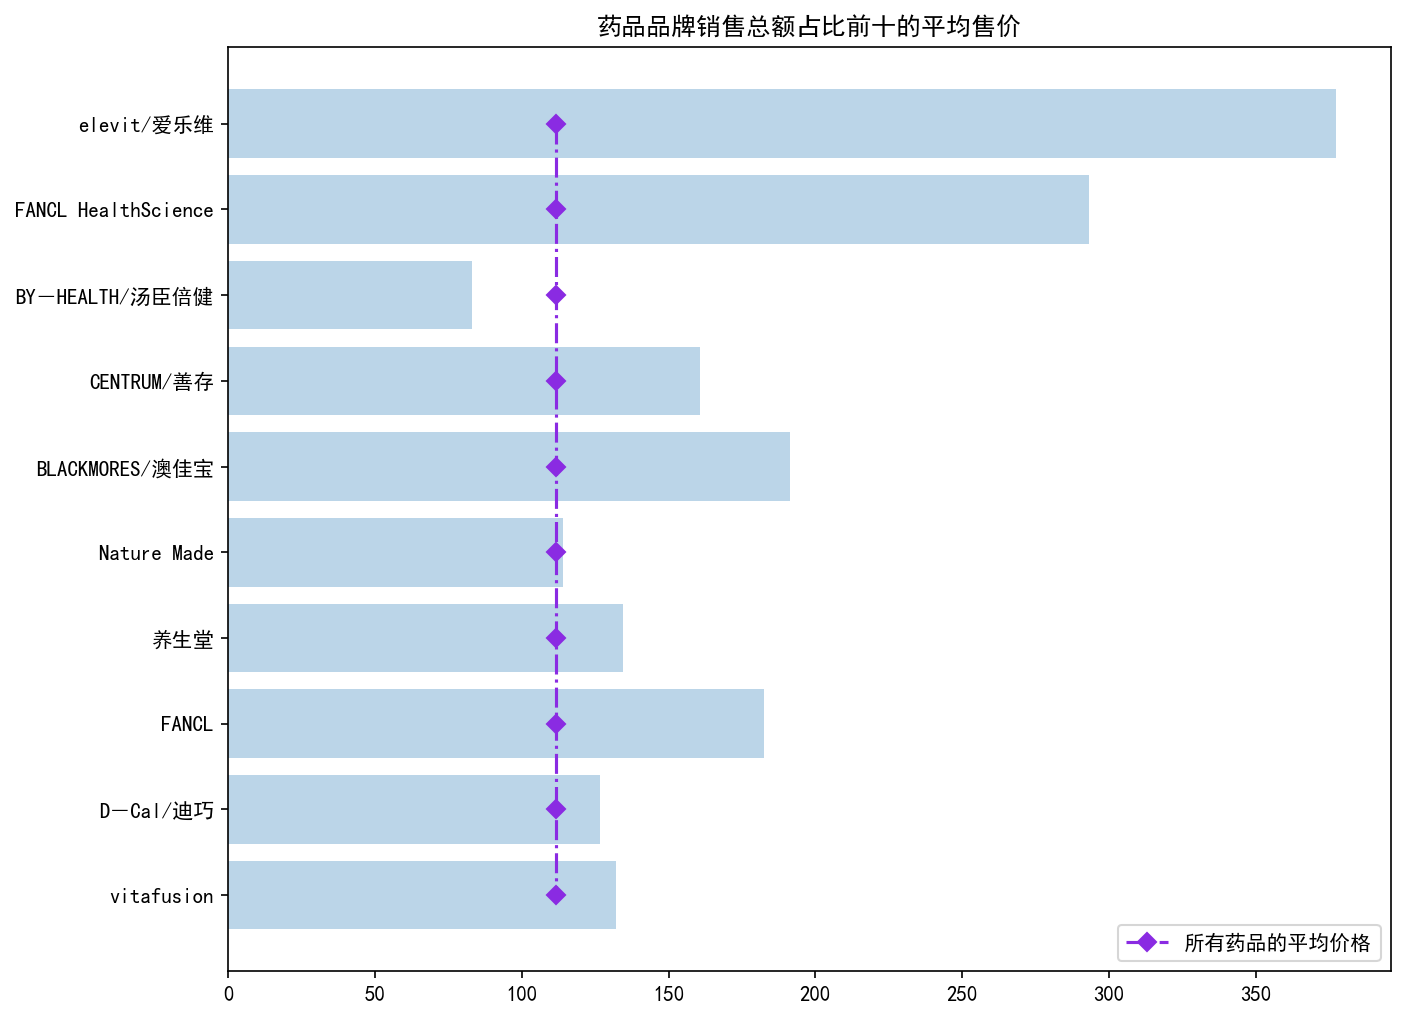

In [25]:
# 计算平均售价，前10的价格基本高于平均价格
mean_price = [brand_groups.get_group(brandName[i]).sold_sum.sum()/brand_groups.get_group(brandName[i]).sold.sum() for i in range(len(brand_groups))]
mean_mean_price = sum(mean_price)/len(mean_price)

#画条形图
y_plot_1 = [ mean_mean_price for i in range(10)] #价格平均线
plt.figure(figsize=(10,8),dpi=150)
plt.barh(brandName[:10][::-1],mean_price[:10][::-1],alpha=0.3)
plt.plot(y_plot_1,brandName[:10],color='blueviolet', marker='D', linestyle='-.',label='所有药品的平均价格')
plt.title('药品品牌销售总额占比前十的平均售价')
plt.legend()  # 显示图例
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\药品品牌销售总额占比前十的平均售价横条形图.jpg')

In [26]:
#计算各个店各个折扣占比
subdf=[]
for i in range(len(brand_groups)):
    condition_8_5 = brand_groups.get_group(brandName[i])["discount"] == 8.5
    condition_9 = brand_groups.get_group(brandName[i])["discount"] == 9
    condition_9_5 = brand_groups.get_group(brandName[i])["discount"] == 9.5
    condition_10 = brand_groups.get_group(brandName[i])["discount"] == 10
    subdf_8_5 = brand_groups.get_group(brandName[i])[condition_8_5]
    subdf_9 = brand_groups.get_group(brandName[i])[condition_9]
    subdf_9_5 = brand_groups.get_group(brandName[i])[condition_9_5]
    subdf_10 = brand_groups.get_group(brandName[i])[condition_10]
    subdf.append([len(subdf_8_5)/len(brand_groups.get_group(brandName[i])),
             len(subdf_9)/len(brand_groups.get_group(brandName[i])),
             len(subdf_9_5)/len(brand_groups.get_group(brandName[i])),
             len(subdf_10)/len(brand_groups.get_group(brandName[i]))])

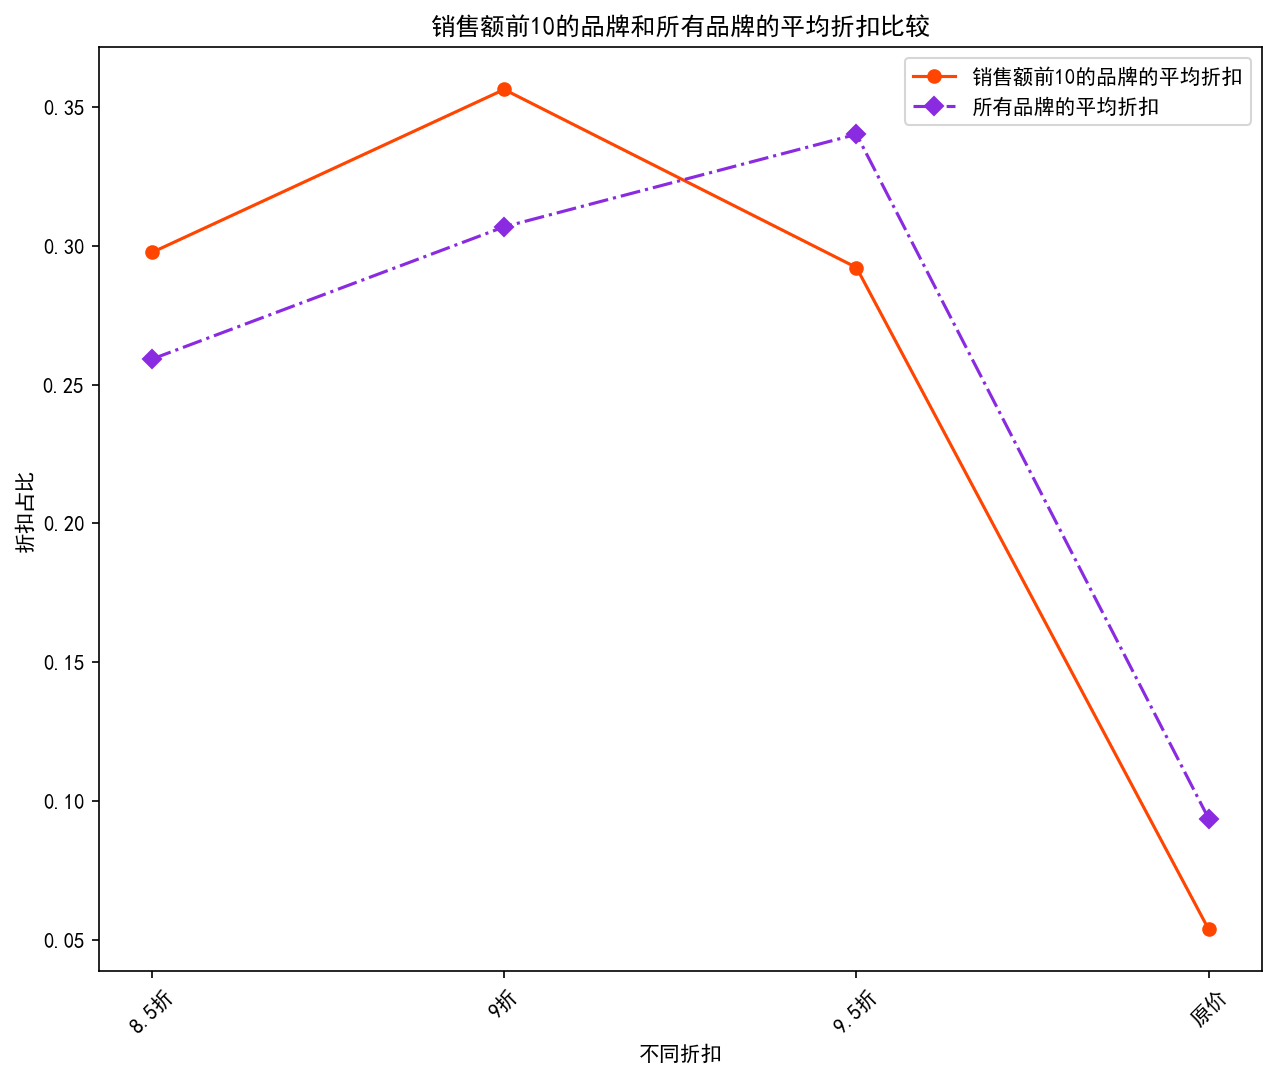

In [27]:
#折线图
names = ['8.5折', '9折', '9.5折', '原价']
x = range(len(names))
 
y_1 = np.sum(subdf[:10],axis = 0)/10 #销售额前10的品牌的平均折扣
y_2 = np.sum(subdf,axis = 0)/len(subdf)  #所有品牌的平均折扣
 
plt.figure(figsize=(10,8),dpi=150)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字

plt.plot(x, y_1, color='orangered', marker='o', linestyle='-', label='销售额前10的品牌的平均折扣')
plt.plot(x, y_2, color='blueviolet', marker='D', linestyle='-.', label='所有品牌的平均折扣')
plt.legend()  # 显示图例
plt.xticks(x, names, rotation=45)
plt.xlabel("不同折扣")  # X轴标签
plt.ylabel("折扣占比")  # Y轴标签
plt.title("销售额前10的品牌和所有品牌的平均折扣比较")
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\销售额前10的品牌和所有品牌的平均折扣比较.jpg')

第四题：
<br>预测天猫维生素类药品未来三个月的销售总额并绘制拟合曲线，评估模型性能和误差。

In [28]:
# 首先先筛选出天猫店铺维生素类的对应商品
need_str = "天猫"
condition_need_str = data.shop_name.str.contains(need_str) 
tianmao_data = data[condition_need_str]
print(len(tianmao_data))

13279


In [29]:
#根据时间进行分组
tianmao_data['date_time'] = pd.to_datetime(tianmao_data['date_time'])  #转化数据类型
tianmao_data_t = tianmao_data.sort_values('date_time') #按时间排序
tianmao_data_t = tianmao_data_t.groupby('date_time')   #按时间分组
one_date = []
one_date_sold_sum = []
float_date = []
three_date = []
three_month_date_sold_sum = []
i=1
for date,group in tianmao_data_t:
    one_date.append(date)
    float_date.append(i)
    i=i+1
    one_date_sold_sum.append(group[["sold_sum"]].sum())
float_date = float_date + [25,26,27]

C:\Users\paq13\AppData\Local\Temp\ipykernel_31004\256953398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tianmao_data['date_time'] = pd.to_datetime(tianmao_data['date_time'])  #转化数据类型


c:\Users\paq13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Randomforest 回归
平均绝对误差： 2583400.7287500002
均方误差： 11434239752554.07
MSE的算术平方根： 3381455.2714111228
R方 得分： 0.8957455796886867
[Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00')]
天猫维生素类药品未来三个月的销售总额: 118494698.64000002 元


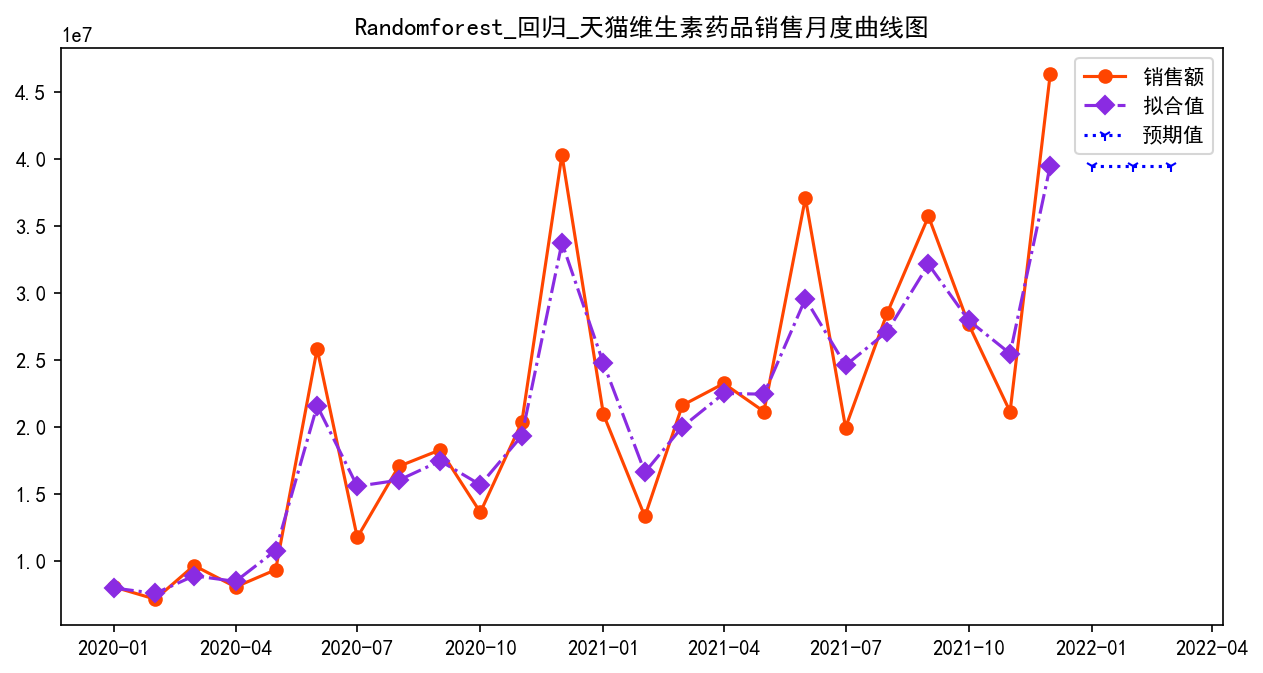

In [30]:
# Randomforest 回归
#训练模型
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math 
model_rf = RandomForestRegressor()
x_train = np.array(float_date[:24]).reshape(-1, 1) 
y_train = one_date_sold_sum 
model_rf.fit(x_train,y_train) #训练集和训练集标签
print("Randomforest 回归")

#模型评估
x_test = np.array(float_date[:24]).reshape(-1, 1)
y_true = one_date_sold_sum 
y_pred = model_rf.predict(x_test)
MAE_score = mean_absolute_error(y_true, y_pred)
MSE_score = mean_squared_error(y_true, y_pred)
RMSE_score = math.sqrt(mean_squared_error(y_true, y_pred))
R2_score = r2_score(y_true, y_pred)
print("平均绝对误差：",MAE_score)      #平均绝对误差，能更好地反映预测值误差的实际情
print("均方误差：",MSE_score )     #均方误差，观测值与真值偏差的平方和，反应预测结果的精确度。
print("MSE的算术平方根：",RMSE_score )   #MSE的算术平方根，用来衡量观测值和真值之间的偏差。
                                    #（开根号之后，误差的结果就与真值在同一个级别）
print("R方 得分：",R2_score)       #介于0-1之间，越接近1，回归拟合效果越好

#模型预测
predict = model_rf.predict(np.array(float_date).reshape(-1, 1)).reshape(-1, 1)

#预测三个月 
predict_index= [pd.Timestamp("2022-01-01"),pd.Timestamp("2022-02-01"),pd.Timestamp("2022-03-01") ]
print(predict_index)
plt.figure(figsize=(10,5),dpi=150)
plt.plot(one_date,one_date_sold_sum,color='orangered', marker='o', linestyle='-',label = '销售额')
plt.plot(one_date,predict[:24],color='blueviolet', marker='D', linestyle='-.',label = '拟合值')
plt.plot(predict_index,predict[24:27],color='blue', marker='1', linestyle=':',label = '预期值')
plt.title( 'Randomforest_回归_天猫维生素药品销售月度曲线图')
plt.legend()
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\Randomforest_回归_天猫维生素药品销售月度曲线图.jpg') 
print("天猫维生素类药品未来三个月的销售总额:",np.sum(predict[24:27]),"元")

线性回归模型
平均绝对误差： 5190549.657542271
均方误差： 50950486891724.46
MSE的算术平方根： 7137960.975777639
R方 得分： 0.5354467292598619
[Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00')]
天猫维生素类药品未来三个月的销售总额: 108163559.05521739 元


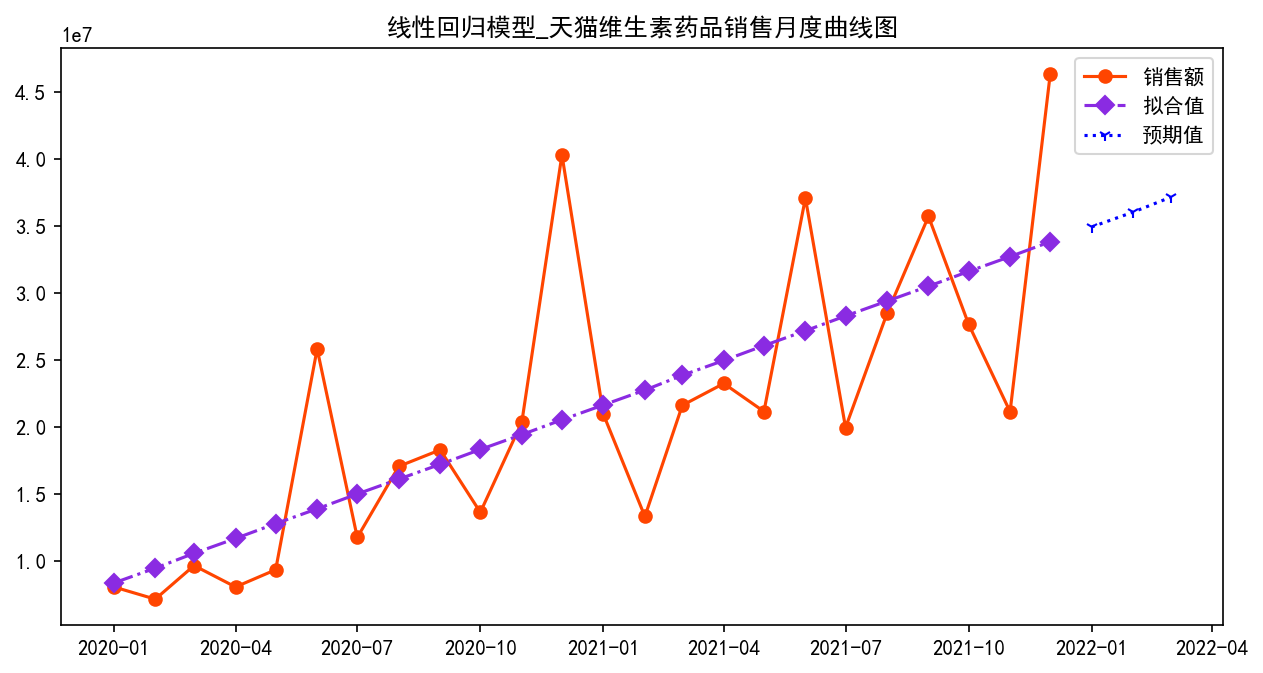

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
clf = LinearRegression()
rf = clf.fit (x_train, y_train) 
print("线性回归模型")
#模型评估
y_pred = rf.predict(x_test) 
MAE_score = mean_absolute_error(y_true, y_pred)
MSE_score = mean_squared_error(y_true, y_pred)
RMSE_score = math.sqrt(mean_squared_error(y_true, y_pred))
R2_score = r2_score(y_true, y_pred)
print("平均绝对误差：",MAE_score)      #平均绝对误差，能更好地反映预测值误差的实际情
print("均方误差：",MSE_score )     #均方误差，观测值与真值偏差的平方和，反应预测结果的精确度。
print("MSE的算术平方根：",RMSE_score )   #MSE的算术平方根，用来衡量观测值和真值之间的偏差。
                                    #（开根号之后，误差的结果就与真值在同一个级别）
print("R方 得分：",R2_score)       #介于0-1之间，越接近1，回归拟合效果越好

#模型预测
predict = rf.predict(np.array(float_date).reshape(-1, 1)).reshape(-1, 1)

#预测三个月 
predict_index= [pd.Timestamp("2022-01-01"),pd.Timestamp("2022-02-01"),pd.Timestamp("2022-03-01") ]
print(predict_index)
plt.figure(figsize=(10,5),dpi=150)
plt.plot(one_date,one_date_sold_sum,color='orangered', marker='o', linestyle='-',label = '销售额')
plt.plot(one_date,predict[:24],color='blueviolet', marker='D', linestyle='-.',label = '拟合值')
plt.plot(predict_index,predict[24:27],color='blue', marker='1', linestyle=':',label = '预期值')
plt.title( '线性回归模型_天猫维生素药品销售月度曲线图')
plt.legend()
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\线性回归模型_天猫维生素药品销售月度曲线图.jpg') 
print("天猫维生素类药品未来三个月的销售总额:",np.sum(predict[24:27]),"元")

c:\Users\paq13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR回归模型
平均绝对误差： 21105432.770833332
均方误差： 555083775241989.8
MSE的算术平方根： 23560215.942176543
R方 得分： -4.061109305421249
[Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00')]
天猫维生素类药品未来三个月的销售总额: 23472.0 元


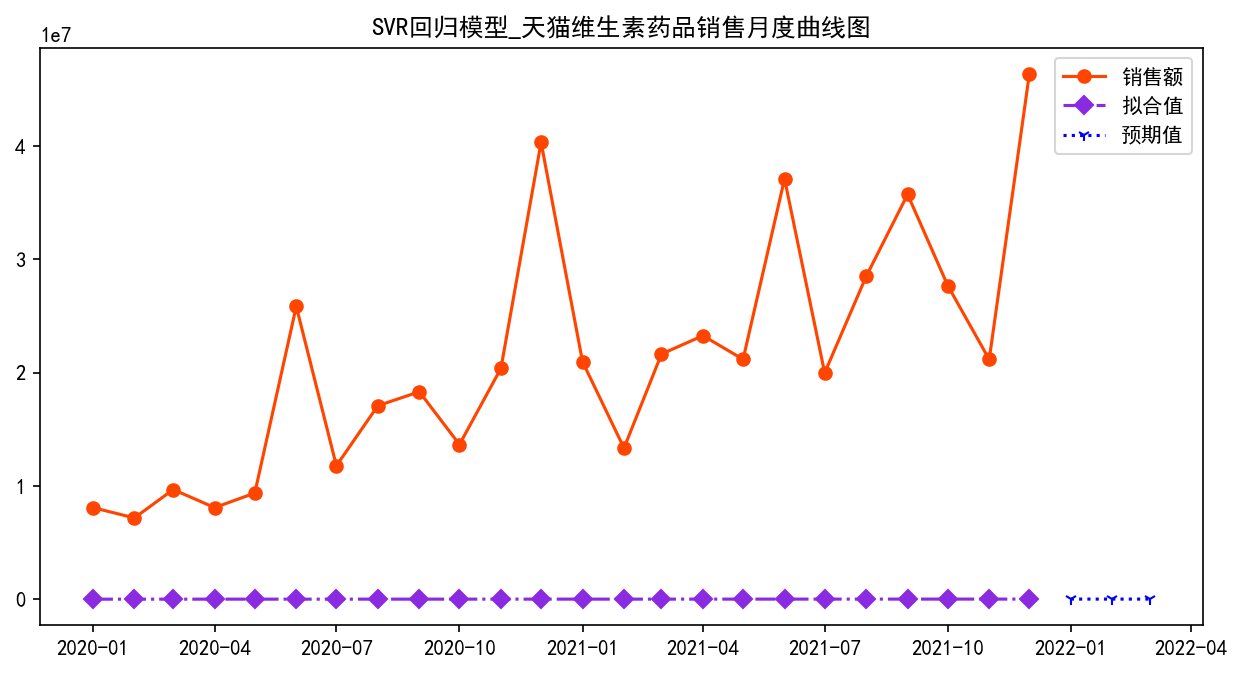

In [43]:
from sklearn.svm import LinearSVR
linearsvr = LinearSVR()
rf = linearsvr.fit (x_train, y_train) 
print("SVR回归模型")
#模型评估
y_pred = rf.predict(x_test) 
MAE_score = mean_absolute_error(y_true, y_pred)
MSE_score = mean_squared_error(y_true, y_pred)
RMSE_score = math.sqrt(mean_squared_error(y_true, y_pred))
R2_score = r2_score(y_true, y_pred)
print("平均绝对误差：",MAE_score)      #平均绝对误差，能更好地反映预测值误差的实际情
print("均方误差：",MSE_score )     #均方误差，观测值与真值偏差的平方和，反应预测结果的精确度。
print("MSE的算术平方根：",RMSE_score )   #MSE的算术平方根，用来衡量观测值和真值之间的偏差。
                                    #（开根号之后，误差的结果就与真值在同一个级别）
print("R方 得分：",R2_score)       #介于0-1之间，越接近1，回归拟合效果越好

#模型预测
predict = rf.predict(np.array(float_date).reshape(-1, 1)).reshape(-1, 1)

#预测三个月 
predict_index= [pd.Timestamp("2022-01-01"),pd.Timestamp("2022-02-01"),pd.Timestamp("2022-03-01") ]
print(predict_index)
plt.figure(figsize=(10,5),dpi=150)
plt.plot(one_date,one_date_sold_sum,color='orangered', marker='o', linestyle='-',label = '销售额')
plt.plot(one_date,predict[:24],color='blueviolet', marker='D', linestyle='-.',label = '拟合值')
plt.plot(predict_index,predict[24:27],color='blue', marker='1', linestyle=':',label = '预期值')
plt.title( 'SVR回归模型_天猫维生素药品销售月度曲线图')
plt.legend()
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\SVR回归模型_天猫维生素药品销售月度曲线图'+'.jpg') 
print("天猫维生素类药品未来三个月的销售总额:",np.sum(predict[24:27]),"元")

c:\Users\paq13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


梯度提升回归模型
平均绝对误差： 361460.3858704513
均方误差： 179893783711.20032
MSE的算术平方根： 424138.8731432198
R方 得分： 0.9983597753288118
[Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00')]
天猫维生素类药品未来三个月的销售总额: 138320533.86066228 元


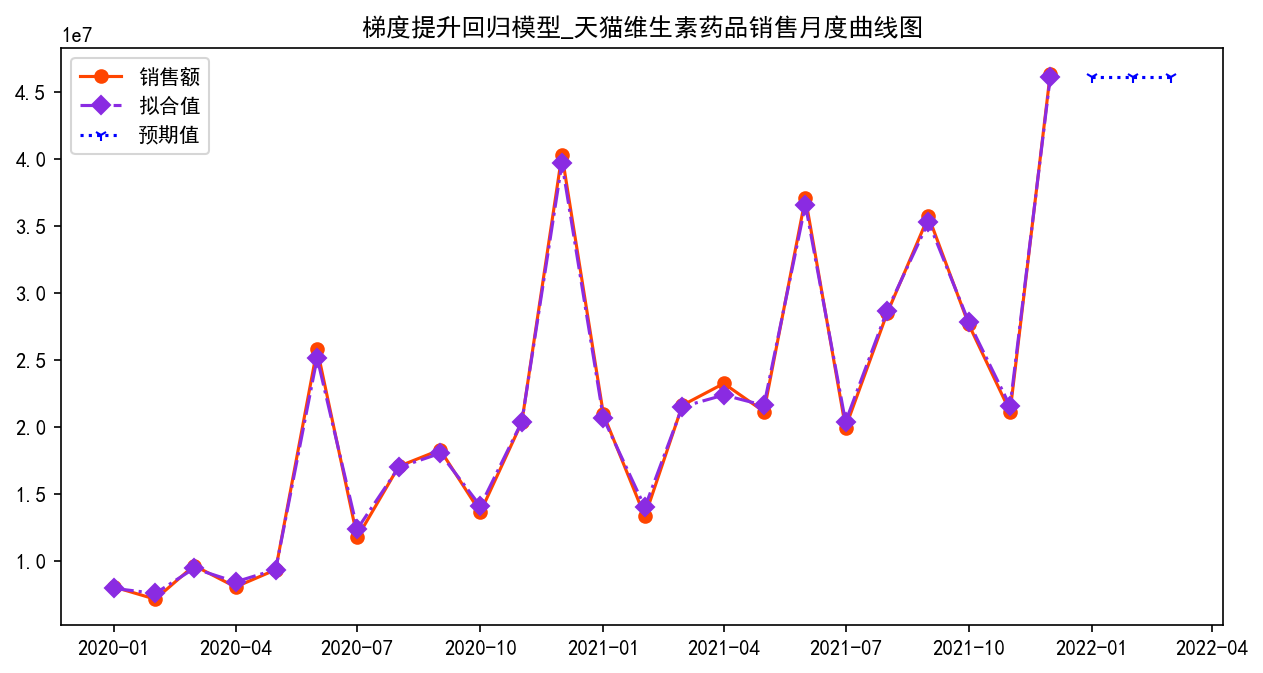

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
rf = clf.fit (x_train, y_train) 
print("梯度提升回归模型")
#模型评估
y_pred = rf.predict(x_test) 
MAE_score = mean_absolute_error(y_true, y_pred)
MSE_score = mean_squared_error(y_true, y_pred)
RMSE_score = math.sqrt(mean_squared_error(y_true, y_pred))
R2_score = r2_score(y_true, y_pred)
print("平均绝对误差：",MAE_score)      #平均绝对误差，能更好地反映预测值误差的实际情
print("均方误差：",MSE_score )     #均方误差，观测值与真值偏差的平方和，反应预测结果的精确度。
print("MSE的算术平方根：",RMSE_score )   #MSE的算术平方根，用来衡量观测值和真值之间的偏差。
                                    #（开根号之后，误差的结果就与真值在同一个级别）
print("R方 得分：",R2_score)       #介于0-1之间，越接近1，回归拟合效果越好

#模型预测
predict = rf.predict(np.array(float_date).reshape(-1, 1)).reshape(-1, 1)

#预测三个月 
predict_index= [pd.Timestamp("2022-01-01"),pd.Timestamp("2022-02-01"),pd.Timestamp("2022-03-01") ]
print(predict_index)
plt.figure(figsize=(10,5),dpi=150)
plt.plot(one_date,one_date_sold_sum,color='orangered', marker='o', linestyle='-',label = '销售额')
plt.plot(one_date,predict[:24],color='blueviolet', marker='D', linestyle='-.',label = '拟合值')
plt.plot(predict_index,predict[24:27],color='blue', marker='1', linestyle=':',label = '预期值')
plt.title( '梯度提升回归模型_天猫维生素药品销售月度曲线图')
plt.legend()
plt.savefig(r'D:\\paq\\yuebing.python_work\\python_work\\test_work\\全国大学生数据分析大赛\\梯度提升回归模型_天猫维生素药品销售月度曲线图'+'.jpg') 
print("天猫维生素类药品未来三个月的销售总额:",np.sum(predict[24:27]),"元")